In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../regressiononly/functions')
sys.path.insert(0, '../regressiononly/training')

from Clusterer import *
from plotting import *
from data_functions import *
import compress_pickle as pickle

2023-07-20 10:47:01.999884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Using variable strings ['E', 'X', 'Y', 'Z'] from binning_utils.py



## Inference using discrete data sets

In [5]:
granularity='full_cell_hits'
#granularity='z_sections'


### if granularity is z-section then input_features is input features
input_features=4
output_dim=1
include_ecal=True

hadronic_detector='hcal'
#incident_angle='17_17deg'
incident_angle='10_30deg'

if granularity=='full_cell_hits':
    path_to_discrete_model='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/discrete_inference'
    if include_ecal:
        model_dir=f'Input{input_features}D_Output{output_dim}D_ecal_{hadronic_detector}_{incident_angle}'
    else:
        model_dir=f'Input{input_features}D_Output{output_dim}D_Noecal_{hadronic_detector}_{incident_angle}'
        
    
    
elif granularity=='z_sections':
    path_to_discrete_model='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/discrete_inference/\
z_segmentation'
    incident_angle='17_17deg'
    n_z_layers=input_features
    model_dir=f'Input{n_z_layers}z_Output{output_dim}D_{hadronic_detector}_{incident_angle}'
    
    

path_to_stat=f'{path_to_discrete_model}/{model_dir}/test' 
path_to_result=f'{path_to_discrete_model}/{model_dir}'


print ('Result Path :', path_to_result)
print('Path to Stat : ', path_to_stat)

#
'''
target_ene, pred_ene, target_theta, pred_theta, target_phi, pred_phi=\
    get_3D_inference_from_discrete_data( path_to_result, path_to_stat)      
    


'''
target_ene, pred_ene=get_1D_inference_from_discrete_data(granularity, path_to_result, path_to_stat)



Using variable strings ['E', 'X', 'Y', 'Z'] from binning_utils.py

Result Path : /media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/discrete_inference/Input4D_Output1D_ecal_hcal_10_30deg
Path to Stat :  /media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/discrete_inference/Input4D_Output1D_ecal_hcal_10_30deg/test
path_to_result /media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/discrete_inference/Input4D_Output1D_ecal_hcal_10_30deg      c  test_predictions.npz


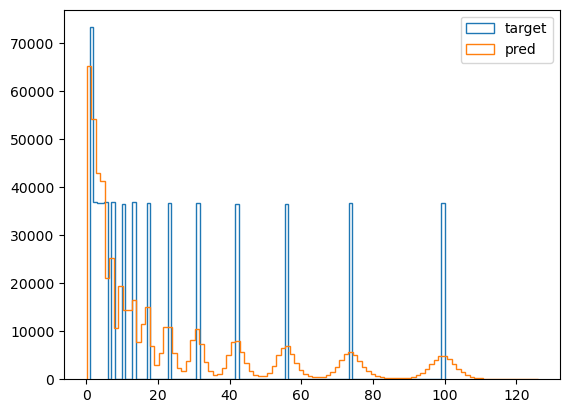

In [6]:
plt.hist(target_ene, bins=100, label='target', histtype='step')
plt.hist(pred_ene, bins=100, label='pred',     histtype='step')
plt.legend()



#print(np.unique(target_ene))

#[1, 2, 3, 4, 5, 7, 10, 13, 17, 23, 31, 42, 56, 74, 100, 133]

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        8.800e+01, 3.400e+01, 9.000e+00, 1.100e+01, 1.800e+01, 2.400e+01,
        4.300e+01, 8.100e+01, 1.310e+02, 4.290e+02, 1.259e+03, 3.134e+03,
        5.900e+03, 8.036e+03, 7.505e+03, 4.696e+03, 2.427e+03, 1.225e+03,
        5.990e+02, 3.090e+02, 1.590e+02, 1.200e+02, 7.200e+01, 5.500e+01,
        3.900e+01, 2.700e+01, 2.100e+01, 1.500e+01, 8.000e+00, 9.000e+00,
        5.000e+00, 5.000e+00, 3.000e+00, 2.000e+00]),
 array([0.        , 0.05      , 0.1       , 0.15000001, 0.2       ,
        0.25      , 0.30000001, 0.34999999, 0.40000001, 0.44999999,
        0.5       , 0.55000001, 0.60000002, 0.64999998, 0.69999999,
        0.75      , 0.80000001, 0.85000002, 0.89999998, 0.94999999,
        1.        , 1.04999995, 1.10000002, 1.14999998, 1.20000005,
        1.25      , 1.29999995, 1.35000002, 1.39999998, 1.45000005,
        1.5       , 1.54999995, 1.60000002, 1.64999998, 1.70000005,
        1.75      , 1.7999

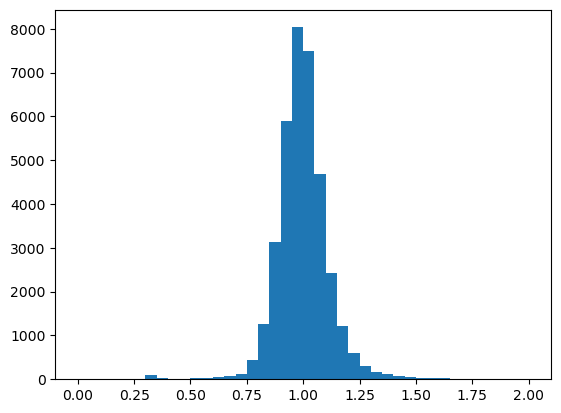

In [11]:
mask=(target_ene>9) & (target_ene <11)
target_ene_masked=target_ene[mask]
pred_ene_masked=pred_ene[mask]
ratio=np.divide(pred_ene_masked,target_ene_masked)
plt.hist(ratio, bins=40, range=(-0,2))


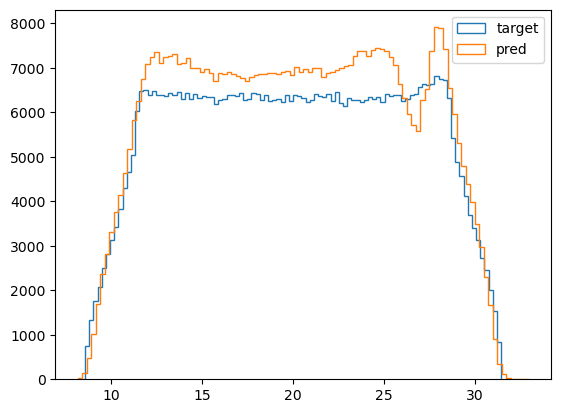

In [5]:
plt.hist(target_theta, bins=100, label='target', histtype='step')
plt.hist(pred_theta, bins=100, label='pred',     histtype='step')
plt.legend()

I am in pp discrete
[1, 2, 3, 6, 10, 15, 25, 39, 63, 100, 158]


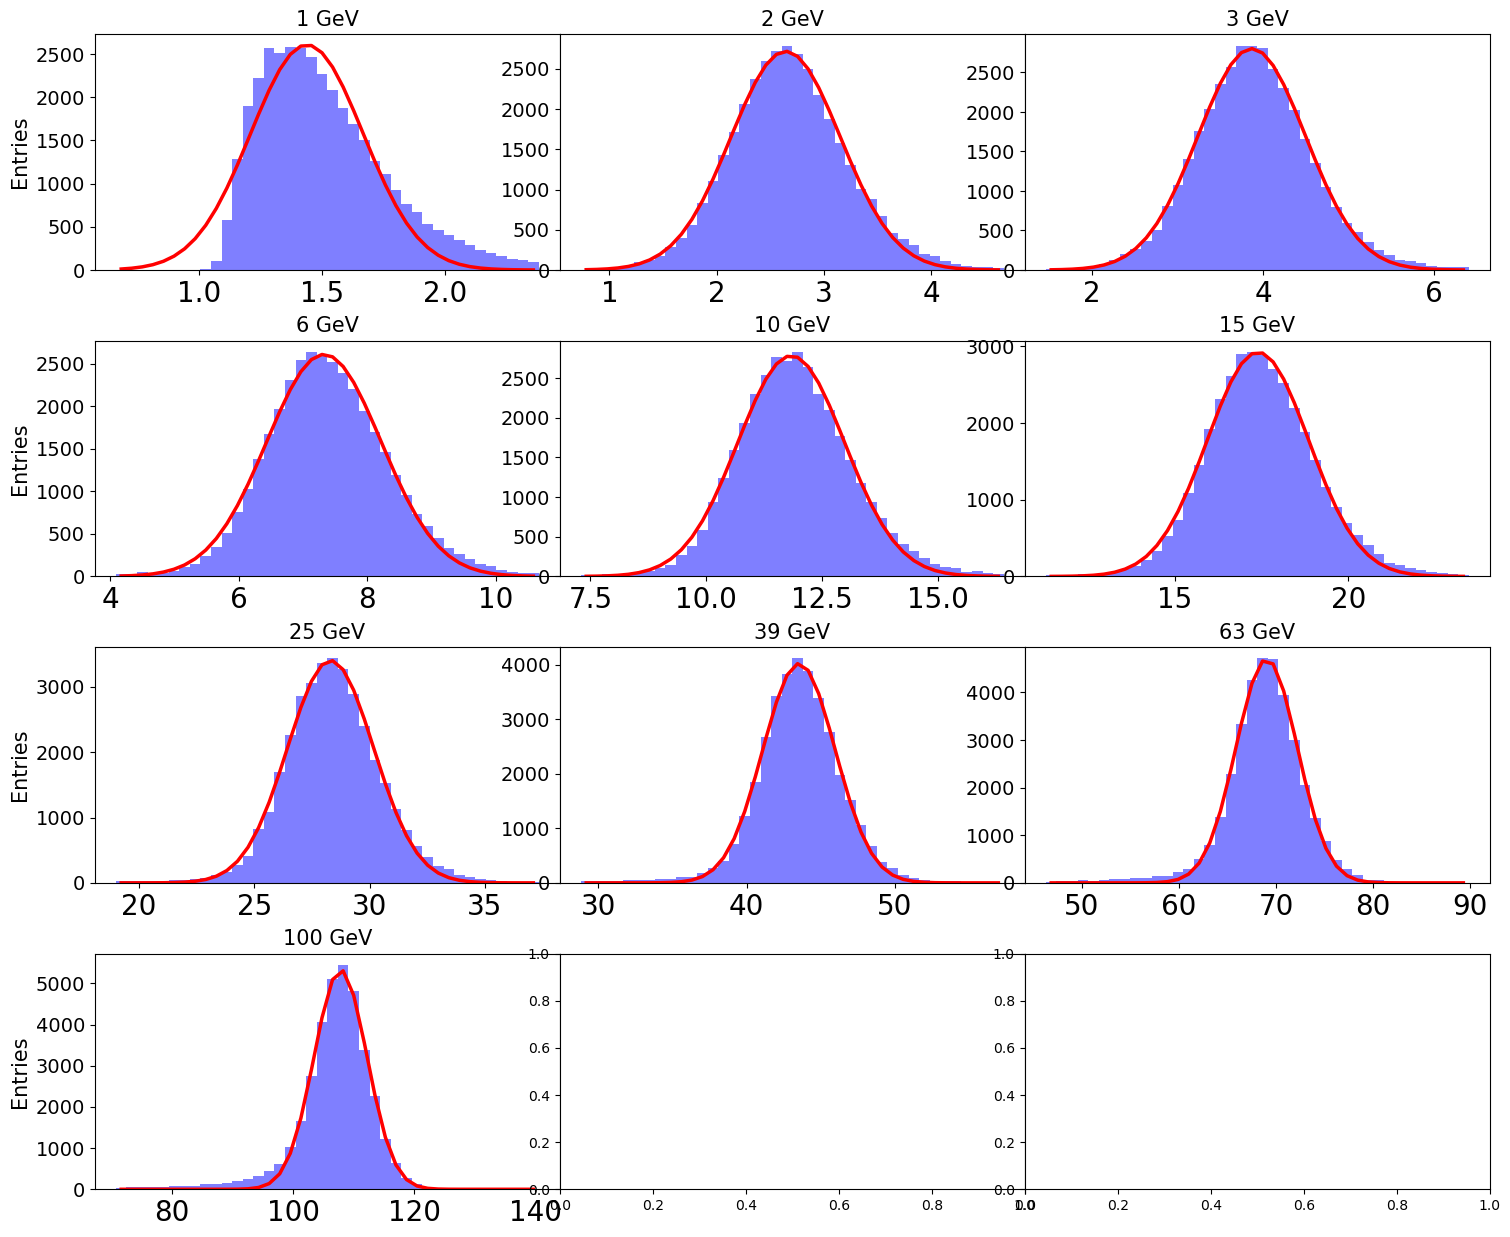

In [39]:
data_type='discrete'
detector='hcal'
particle='pp'
nbins=40

#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"

min_val=0
max_val=110
#Nbins=37
if (data_type=='discrete') and (particle=='pp'):
    min_val=0
    max_val=110
    if incident_angle=='10_30deg':
        binning=[1, 2, 3, 4, 5, 7, 10, 13, 17, 23, 31, 42, 56, 74, 100, 133]   #133
    #else:
    #    binning=[ 1,  2,   3,   6, 10, 15, 25,  39, 63, 100,  158]
    print('I am in pp discrete')
elif (data_type=='discrete') and (particle=='neutron'):
    min_val=10
    max_val=310
    print('I am in neutron discrete')
    binning=[10, 11, 12, 13, 14, 16, 17, 19, 21, 24, 26, 29, 32, 35, 39, 43, 47, 52, 57, 63, 70, 77, 85,\
             93, 103, 114, 125, 138, 152, 168, 185, 204, 225, 248, 274, 302]
print(binning)


#get_res_scale_fit_log10_log2(truth,pred, binning, nbins, log_base, particle, label='energy', fit='True'):
resolution_fit, pred_over_truth_fit, true_fit,slices_fit,slices_pred_truth =get_res_scale_fit_log10_log2\
(target_ene,pred_ene, binning, nbins, data_type, particle, 'energy', fit=True, plot_range=0.6)


In [40]:
approach='ds_'
name_tag=f'ds_{output_dim}D_output_'
particle='pp'
#input_dim='4D'
learning_rate='e3'
latent_size=64
error_type='mse'
#particle='pp'
num_layer=4
include_ecal=False

if include_ecal:
    ecal_status='with'
else:
    ecal_status='No'
detector_status=f'{hadronic_detector}_{ecal_status}_ecal'  
if granularity=='z_sections':
    include_ecal=False
    particle_detector=f'{particle}_{detector_status}_Input{input_features}Z_Output{output_dim}D_L{num_layer}_lr{learning_rate}_\
size{latent_size}_{error_type}_{incident_angle}'
    
else:
    particle_detector=f'{particle}_{detector_status}_Input{input_features}D_Output{output_dim}D_L{num_layer}_lr{learning_rate}_\
size{latent_size}_{error_type}_{incident_angle}'
  
    
print_parameter(true_fit, approach +'energy',particle_detector ) 
#print_parameter(resolution_scale_corr_median, name_tag+'res_cor',particle_detector  ) ## std over median
print_parameter(resolution_fit, approach +'res_fit', particle_detector ) ## sigma over mean fit 

#print_parameter(res_sigma_median, name_tag +'res_sigma', particle_detector ) 
#print_parameter(res_std_median, name_tag +'res_std_median', particle_detector ) 
#print_parameter(res_sigma_median, name_tag +'res_sigma_median', particle_detector )
print_parameter( pred_over_truth_fit, approach +'scale_median', particle_detector )

'''
df = pd.DataFrame(slices_fit)
df.to_csv(f'{output_path}/pred_{approach}_{hadronic_detector}_{readout}.csv', index=False)  
#df_straw_truth = pd.DataFrame(slices_truth)
#df.to_csv(f'{output_path}/true_{approach}_{particle_detector}.csv', index=False)

## Pred over Truth
df_straw_truth = pd.DataFrame(slices_pred_truth)
df_straw_truth.to_csv(f'{output_path}/pred_true_{approach}_{hadronic_detector}_{readout}.csv', index=False)
'''



ds_energy_pp_hcal_No_ecal_Input4D_Output1D_L4_lre3_size64_mse_17_17deg=np. array([  1.,   2.,   3.,   6.,  10.,  15.,  25.,  39.,  63., 100.])
ds_res_fit_pp_hcal_No_ecal_Input4D_Output1D_L4_lre3_size64_mse_17_17deg=np. array([0.159226, 0.19327 , 0.162609, 0.121663, 0.097471, 0.084185,
       0.066057, 0.056153, 0.045699, 0.040486])
ds_scale_median_pp_hcal_No_ecal_Input4D_Output1D_L4_lre3_size64_mse_17_17deg=np. array([1.437753, 1.320803, 1.289279, 1.220816, 1.183472, 1.159862,
       1.132374, 1.116455, 1.095934, 1.078467])


"\ndf = pd.DataFrame(slices_fit)\ndf.to_csv(f'{output_path}/pred_{approach}_{hadronic_detector}_{readout}.csv', index=False)  \n#df_straw_truth = pd.DataFrame(slices_truth)\n#df.to_csv(f'{output_path}/true_{approach}_{particle_detector}.csv', index=False)\n\n## Pred over Truth\ndf_straw_truth = pd.DataFrame(slices_pred_truth)\ndf_straw_truth.to_csv(f'{output_path}/pred_true_{approach}_{hadronic_detector}_{readout}.csv', index=False)\n"

In [12]:
## Calo Config: ECAL + HCAL
## Angle = [10, 30] deg
## Energy Discrete 
## Input [1D, 4D] , output 1D

#### OUTPUT 1D INPUT 4D
ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
ds_res_fit_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([0.132504, 0.16347 , 0.146986, 0.117995, 0.107497, 0.092505,
       0.086217, 0.077024, 0.067624, 0.063765, 0.054861, 0.05084 ,
       0.045406, 0.043488, 0.036342])
ds_scale_median_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([1.161978, 0.975009, 0.99517 , 0.999129, 0.999003, 0.997085,
       0.99127 , 0.995905, 0.99209 , 0.992178, 0.996025, 0.996372,
       0.994097, 0.996587, 0.996023])


#### OUTPUT 1D INPUT 3D
ds_energy_pp_hcal_with_ecal_Input3D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
ds_res_fit_pp_hcal_with_ecal_Input3D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([0.117985, 0.151627, 0.149026, 0.1228  , 0.106863, 0.093717,
       0.085904, 0.074314, 0.068479, 0.063551, 0.056698, 0.050464,
       0.046243, 0.042022, 0.037036])
ds_scale_median_pp_hcal_with_ecal_Input3D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([1.144733, 0.980483, 0.993893, 0.997692, 0.998702, 0.997352,
       0.991634, 0.996693, 0.996601, 0.993637, 0.996889, 0.995506,
       0.996749, 0.99986 , 0.99555 ])


#### OUTPUT 1D INPUT 2D
ds_energy_pp_hcal_with_ecal_Input2D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
ds_res_fit_pp_hcal_with_ecal_Input2D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([0.111088, 0.149426, 0.148467, 0.122919, 0.106684, 0.090536,
       0.084764, 0.074304, 0.068164, 0.061541, 0.055496, 0.050324,
       0.045494, 0.042019, 0.038237])
ds_scale_median_pp_hcal_with_ecal_Input2D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([1.140576, 0.989645, 0.994698, 1.000248, 1.002428, 0.997102,
       0.995713, 0.997329, 0.994445, 0.993998, 0.994157, 0.995241,
       0.998655, 0.996812, 0.997004])

#### OUTPUT 1D INPUT 1D
ds_energy_pp_hcal_with_ecal_Input1D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
ds_res_fit_pp_hcal_with_ecal_Input1D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([0.063508, 0.153619, 0.139285, 0.118096, 0.108634, 0.095036,
       0.086893, 0.075165, 0.067207, 0.063477, 0.059749, 0.055368,
       0.0491  , 0.046283, 0.040199])
ds_scale_median_pp_hcal_with_ecal_Input1D_Output1D_L4_lre3_size64_mse_10_30deg=np. array([1.084022, 1.005292, 1.011655, 1.006784, 1.006079, 1.001055,
       0.998629, 0.997764, 0.997407, 0.99631 , 1.001814, 1.00276 ,
       1.003572, 1.004014, 0.998716])


### OUTPUT 3D, INPUT 4D, ANGLE - 10 -30 DEG,  ECAL + HCAL
ds_energy_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse_10_30deg=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
ds_res_fit_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse_10_30deg=np. array([0.115703, 0.172074, 0.153489, 0.135938, 0.121741, 0.109599,
       0.098562, 0.088354, 0.081736, 0.07396 , 0.066535, 0.062131,
       0.057021, 0.051955, 0.047515])
ds_scale_median_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse_10_30deg=np. array([1.123564, 0.988927, 0.989512, 0.991362, 0.989946, 0.984177,
       0.986386, 0.991512, 0.995329, 0.995199, 0.993127, 0.993242,
       0.996144, 0.998096, 0.991028])

ds_phi_3Doutput_phi_pp_hcal_4_L4_lre3_size64_mse=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
ds_phi_3Doutput_res_sigma_pp_hcal_4_L4_lre3_size64_mse=np. array([64.200392, 57.167455, 54.296241, 51.844851,  2.635363, 45.261807,
       41.099877, 39.520196, 37.601936, 35.553145, 33.296915, 30.209387,
       28.737532, 27.712136, 28.639827])

ds_theta_3Doutput_theta_pp_hcal_4_Lay4_lre3_size64_mse=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
ds_theta_3Doutput_res_sigma_pp_hcal_4_Lay4_lre3_size64_mse=np. array([12.817145, 10.82564 , 10.156156,  9.397438,  8.686663,  7.636673,
        7.044074,  6.598939,  6.398987,  5.835053,  5.488618,  5.109353,
        4.75464 ,  4.492746,  4.288095])



### CALICE UNCORRECTED
ene_calice_uncorr_pm=[9.85, 14.8, 17.9, 20.0, 24.9, 34.9, 39.8, 45.0, 49.9, 59.8, 79.9]
res_calice_uncorr_pm=[0.174, 0.147, 0.133, 0.131, 0.118, 0.0980, 0.0945, 0.0895, 0.083, 0.0760, 0.0646]

### CALICE CORRECTED GLOBAL SC
ene_calice_corr_pm=[10.1, 15.0, 18.0, 19.8, 24.8, 35.1, 40.0, 44.8, 49.8, 60.1, 80.0]
res_calice_corr_pm=[0.150, 0.121, 0.108, 0.106, 0.0920, 0.0798, 0.0740, 0.0700, 0.0650, 0.0596, 0.0537]


### HCAL + ECAL,  10 -30 DEG,  STRAWMAN,  
straw_discrete_energy_pp_hcal_with_ecal_10_30deg=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg=np. array([0.5748  , 0.423479, 0.354707, 0.324964, 0.281366, 0.216982,
       0.179239, 0.150666, 0.128259, 0.110343, 0.095243, 0.08347 ,
       0.073066, 0.063552, 0.053316])
straw_discrete_scale_median_pp_hcal_with_ecal_10_30deg=np. array([0.604453, 0.634241, 0.653127, 0.681595, 0.717147, 0.762174,
       0.789358, 0.807832, 0.822634, 0.836532, 0.852265, 0.865178,
       0.877904, 0.887713, 0.895942])


### HCAL NO ECAL + 17 - 37 deg, STRAWMAN DISCRETE With ECAL
straw_discrete_energy_pp_hcal_with_ecal_17_37deg=np. array([  1.      ,   2.      ,   3.997347,   7.      ,  11.505055,
        20.003391,  31.      ,  48.849156,  74.      , 100.      ])
straw_discrete_res_fit_pp_hcal_with_ecal_17_37deg=np. array([0.670227, 0.513571, 0.368178, 0.238904, 0.178579, 0.135359,
       0.105273, 0.086104, 0.071127, 0.059331])
straw_discrete_scale_median_pp_hcal_with_ecal_17_37deg=np. array([0.591561, 0.624346, 0.677143, 0.759115, 0.80016 , 0.827498,
       0.849311, 0.868012, 0.883367, 0.8932  ])


### HCAL NO ECAL + 17 - 17 deg, STRAWMAN DISCRETE
straw_discrete_energy_pp_hcal_No_ecal_17_17deg=np. array([  1.,   2.,   3.,   6.,  10.,  15.,  25.,  39.,  63., 100.])
straw_discrete_res_fit_pp_hcal_No_ecal_17_17deg=np. array([0.608265, 0.451325, 0.378973, 0.226326, 0.166168, 0.134674,
       0.108214, 0.084625, 0.067882, 0.053351])
straw_discrete_scale_median_pp_hcal_No_ecal_17_17deg=np. array([0.703604, 0.720301, 0.728842, 0.815645, 0.843682, 0.861566,
       0.878099, 0.890861, 0.905418, 0.915007])


## Z SEGMENTATION 
ds_energy_pp_hcal_No_ecal_Input1Z_Output1D_L4_lre3_size64_mse_17_17deg=np. array([  1.,   2.,   3.,   6.,  10.,  15.,  25.,  39.,  63., 100.])
ds_res_fit_pp_hcal_No_ecal_Input1Z_Output1D_L4_lre3_size64_mse_17_17deg=np. array([0.516675, 0.383395, 0.318422, 0.201282, 0.150853, 0.118993,
       0.089868, 0.072269, 0.057914, 0.046467])
ds_scale_median_pp_hcal_No_ecal_Input1Z_Output1D_L4_lre3_size64_mse_17_17deg=np. array([0.809327, 0.891122, 0.933991, 0.999677, 1.022313, 1.029161,
       1.030059, 1.033437, 1.033526, 1.029438])

### Z SEG = 5
ds_energy_pp_hcal_No_ecal_Input5Z_Output1D_L4_lre3_size64_mse_17_17deg=np. array([  1.,   2.,   3.,   6.,  10.,  15.,  25.,  39.,  63., 100.])
ds_res_fit_pp_hcal_No_ecal_Input5Z_Output1D_L4_lre3_size64_mse_17_17deg=np. array([0.342896, 0.301289, 0.286091, 0.196714, 0.136917, 0.107719,
       0.079076, 0.066268, 0.05257 , 0.043271])
ds_scale_median_pp_hcal_No_ecal_Input5Z_Output1D_L4_lre3_size64_mse_17_17deg=np. array([1.22806 , 0.909992, 0.867073, 0.914931, 0.966673, 0.991927,
       1.014552, 1.025164, 1.030784, 1.027653])



### Z SEG = 15
ds_energy_pp_hcal_No_ecal_Input15Z_Output1D_L4_lre3_size64_mse_17_17deg=np. array([  1.,   2.,   3.,   6.,  10.,  15.,  25.,  39.,  63., 100.])
ds_res_fit_pp_hcal_No_ecal_Input15Z_Output1D_L4_lre3_size64_mse_17_17deg=np. array([0.347507, 0.297531, 0.281396, 0.187891, 0.128179, 0.100368,
       0.075107, 0.061206, 0.048255, 0.040596])
ds_scale_median_pp_hcal_No_ecal_Input15Z_Output1D_L4_lre3_size64_mse_17_17deg=np. array([1.121041, 0.854963, 0.849068, 0.914844, 0.964772, 0.982751,
       1.005815, 1.015068, 1.023477, 1.022598])


### Z SEG = 25
ds_energy_pp_hcal_No_ecal_Input25Z_Output1D_L4_lre3_size64_mse_17_17deg=np. array([  1.,   2.,   3.,   6.,  10.,  15.,  25.,  39.,  63., 100.])
ds_res_fit_pp_hcal_No_ecal_Input25Z_Output1D_L4_lre3_size64_mse_17_17deg=np. array([0.312514, 0.286299, 0.261016, 0.175831, 0.127113, 0.102024,
       0.07539 , 0.060576, 0.048452, 0.041151])
ds_scale_median_pp_hcal_No_ecal_Input25Z_Output1D_L4_lre3_size64_mse_17_17deg=np. array([1.177444, 0.881446, 0.861915, 0.931446, 0.963765, 0.983004,
       1.002375, 1.015238, 1.021063, 1.020163])






### ZDC DATA
## ANGLE = 0 - 0.5 DEG
## OUTPUT 3D, INPUT 4D
# STRAWMAN UNSTAGGERED 


straw_discrete_unstaggered_energy_neutron_zdc_No_ecal=np. array([ 10.,  11.,  12.,  13.,  14.,  16.,  17.,  19.,  21.,  24.,  26.,
        29.,  32.,  35.,  39.,  43.,  47.,  52.,  57.,  63.,  70.,  77.,
        85.,  93., 103., 114., 125., 138., 152., 168., 185., 204., 225.,
       248., 274.])
straw_discrete_unstaggered_res_fit_neutron_zdc_No_ecal=np. array([0.397702, 0.358557, 0.326479, 0.321159, 0.290702, 0.265546,
       0.262371, 0.236577, 0.228381, 0.20743 , 0.195446, 0.173633,
       0.179413, 0.16104 , 0.159149, 0.142226, 0.141102, 0.134226,
       0.131352, 0.128521, 0.12136 , 0.114421, 0.108429, 0.101597,
       0.10107 , 0.091291, 0.093579, 0.088914, 0.085655, 0.078301,
       0.078729, 0.074136, 0.071799, 0.075312, 0.080096])
straw_discrete_unstaggered_scale_median_neutron_zdc_No_ecal=np. array([0.565314, 0.580291, 0.59001 , 0.601966, 0.610731, 0.625057,
       0.629425, 0.644986, 0.648724, 0.66209 , 0.671692, 0.680561,
       0.684779, 0.692336, 0.702379, 0.709855, 0.713699, 0.718225,
       0.724133, 0.730479, 0.737105, 0.741672, 0.746658, 0.753807,
       0.754846, 0.762843, 0.763347, 0.767981, 0.768877, 0.773719,
       0.775612, 0.775778, 0.776305, 0.773977, 0.767686])

#### ZDC staggered h3


straw_discrete_staggered_h3_energy_neutron_zdc_No_ecal=np. array([ 10.,  11.,  12.,  13.,  14.,  16.,  17.,  19.,  21.,  24.,  26.,
        29.,  32.,  35.,  39.,  43.,  47.,  52.,  57.,  63.,  70.,  77.,
        85.,  93., 103., 114., 125., 138., 152., 168., 185., 204., 225.,
       248., 274.])
straw_discrete_staggered_h3_res_fit_neutron_zdc_No_ecal=np. array([0.367194, 0.364922, 0.330033, 0.303942, 0.293865, 0.276734,
       0.264655, 0.231685, 0.223668, 0.210406, 0.196749, 0.183617,
       0.165346, 0.167592, 0.154036, 0.146568, 0.13578 , 0.132779,
       0.130628, 0.121773, 0.110939, 0.101545, 0.105064, 0.108021,
       0.09647 , 0.09478 , 0.096806, 0.084928, 0.079194, 0.07908 ,
       0.077644, 0.06879 , 0.069327, 0.066858, 0.070975])
straw_discrete_staggered_h3_scale_median_neutron_zdc_No_ecal=np. array([0.574711, 0.57947 , 0.591754, 0.607148, 0.614944, 0.624953,
       0.633367, 0.642424, 0.648693, 0.666825, 0.671567, 0.6773  ,
       0.692313, 0.691713, 0.702189, 0.707806, 0.714283, 0.719407,
       0.724659, 0.730293, 0.738957, 0.744823, 0.748934, 0.748383,
       0.758235, 0.760637, 0.764543, 0.770439, 0.772705, 0.772711,
       0.773927, 0.775925, 0.773774, 0.772885, 0.767031])




## STAGGERED OUTPUT DEEPSETS
ds_zdc_3Doutput_staggered_h3_energy_neutron_hcal_input4D_Lay4_lre3_size64_mse=np. array([ 10.,  11.,  12.,  13.,  14.,  16.,  17.,  19.,  21.,  24.,  26.,
        29.,  32.,  35.,  39.,  43.,  47.,  52.,  57.,  63.,  70.,  77.,
        85.,  93., 103., 114., 125., 138., 152., 168., 185., 204., 225.,
       248., 274.])
ds_zdc_3Doutput_staggered_h3_res_fit_neutron_hcal_input4D_Lay4_lre3_size64_mse=np. array([0.089833, 0.097292, 0.104328, 0.114589, 0.119751, 0.122331,
       0.119609, 0.11401 , 0.108694, 0.102377, 0.099926, 0.097045,
       0.092733, 0.089366, 0.086324, 0.08202 , 0.078346, 0.075344,
       0.072692, 0.070318, 0.066623, 0.064438, 0.061832, 0.060364,
       0.058631, 0.057217, 0.056358, 0.05417 , 0.052046, 0.050117,
       0.048412, 0.047298, 0.04631 , 0.045245, 0.044445])
ds_zdc_3Doutput_staggered_h3_scale_median_neutron_hcal_input4D_Lay4_lre3_size64_mse=np. array([1.095701, 1.044841, 1.014258, 0.997793, 0.991561, 0.99058 ,
       0.992886, 0.993628, 0.993925, 0.994798, 0.995912, 0.998351,
       0.999238, 1.001044, 1.001975, 1.001323, 1.003794, 1.006092,
       1.006587, 1.007632, 1.008368, 1.007785, 1.006559, 1.006936,
       1.007512, 1.008334, 1.008856, 1.010822, 1.01278 , 1.012163,
       1.01172 , 1.009612, 1.00802 , 1.005222, 1.00089 ])



### UNSTAGGERED OUTPUT DEEPSETS
ds_zdc_3Doutput_unstaggered_energy_neutron_hcal_input4D_Lay4_lre3_size64_mse=np. array([ 10.,  11.,  12.,  13.,  14.,  16.,  17.,  19.,  21.,  24.,  26.,
        29.,  32.,  35.,  39.,  43.,  47.,  52.,  57.,  63.,  70.,  77.,
        85.,  93., 103., 114., 125., 138., 152., 168., 185., 204., 225.,
       248., 274.])
ds_zdc_3Doutput_unstaggered_res_fit_neutron_hcal_input4D_Lay4_lre3_size64_mse=np. array([0.097517, 0.10289 , 0.108432, 0.11502 , 0.118438, 0.12081 ,
       0.119395, 0.112491, 0.10904 , 0.103016, 0.098178, 0.094388,
       0.090942, 0.087268, 0.084714, 0.081177, 0.075838, 0.074118,
       0.071572, 0.068369, 0.066265, 0.064824, 0.06105 , 0.059875,
       0.058481, 0.056285, 0.055248, 0.053236, 0.050244, 0.04941 ,
       0.047685, 0.045491, 0.044781, 0.044995, 0.046178])
ds_zdc_3Doutput_unstaggered_scale_median_neutron_hcal_input4D_Lay4_lre3_size64_mse=np. array([1.097969, 1.051282, 1.022005, 1.006492, 0.996954, 0.992089,
       0.993035, 0.992435, 0.996296, 0.997071, 0.997513, 0.998806,
       1.001351, 1.002795, 1.005843, 1.007937, 1.00926 , 1.009097,
       1.008323, 1.007696, 1.007787, 1.007064, 1.005194, 1.005639,
       1.005546, 1.008303, 1.009052, 1.010996, 1.012138, 1.012425,
       1.011975, 1.010727, 1.009327, 1.006083, 0.999482])



In [18]:
ratio=np.divide(  res_calice_uncorr_pm, res_calice_corr_pm)
print(ratio)

[1.16     1.214876 1.231481 1.235849 1.282609 1.22807  1.277027 1.278571
 1.276923 1.275168 1.20298 ]


Strawman (This work)
CALICE Uncorrected


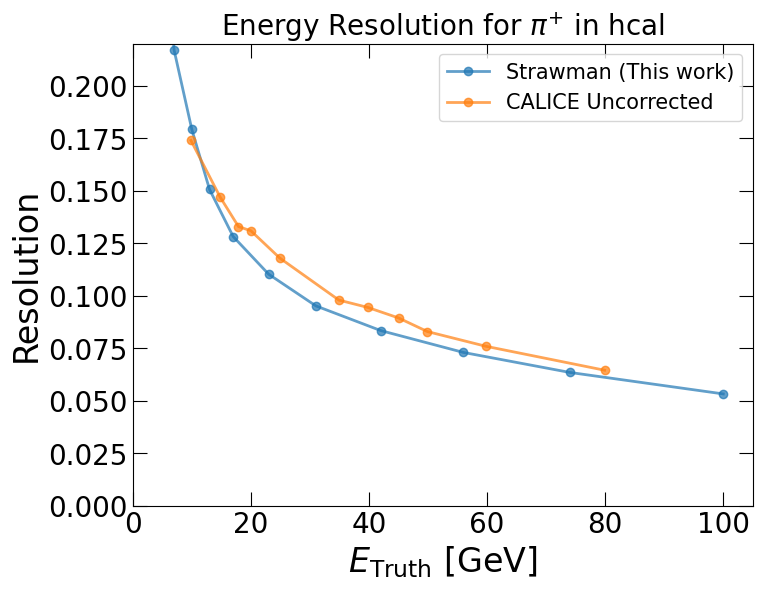

In [17]:
energy_min=2
energy_max=105
mask=np.logical_and(ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg>energy_min,
      ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg<energy_max)


var_X=[straw_discrete_energy_pp_hcal_with_ecal_10_30deg[mask],
       ene_calice_uncorr_pm]
       #ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg[mask], 
       #  ene_calice_uncorr_pm]

labels=[ "Strawman (This work)", 'CALICE Uncorrected' ] #"Deepset 4D hit",, 'CALICE corrected']

var_Y_res=[straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg[mask], 
           res_calice_uncorr_pm]
            #ds_res_fit_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
            #res_calice_corr_pm]


particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[0,105]
ylim_max=[0.0,0.22]
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

## Fit to the Energy resoltuion
## Data => With Ecal,  angle = 10 - 30 deg, input, ouput =[4, 1]

------------  0.137815
Strawman
------------  0.0770875
Deepset 4D hit (1D output)
------------  0.09133250000000001
Deepset 4D hit (3D outupt)
------------  37.7181725
Angular Resolution ($\phi$)
------------  6.363894166666667
Angular Resolution ($	heta$)


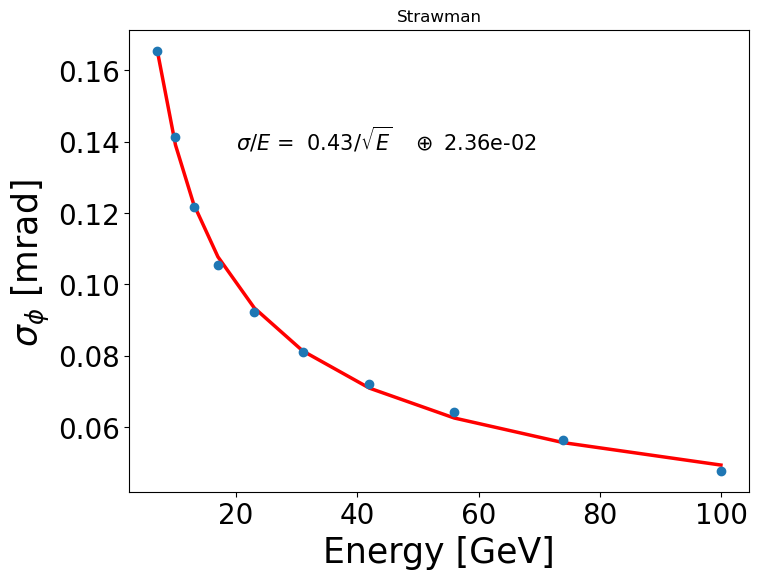

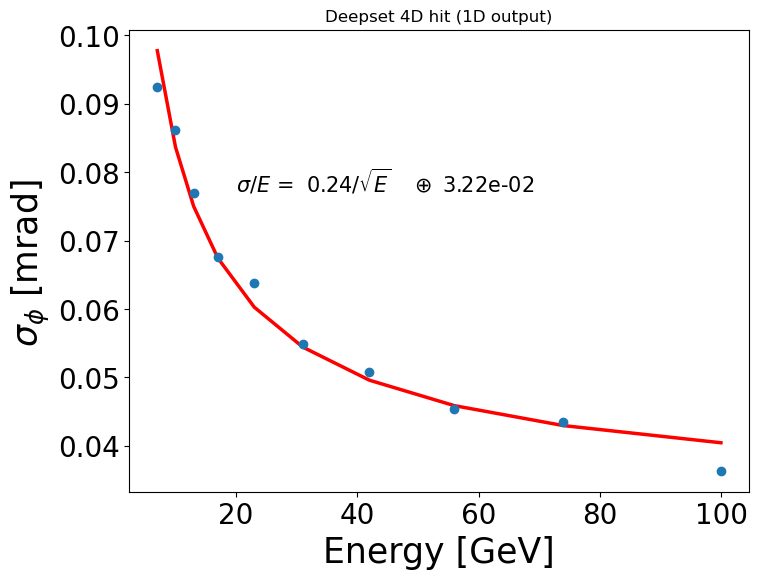

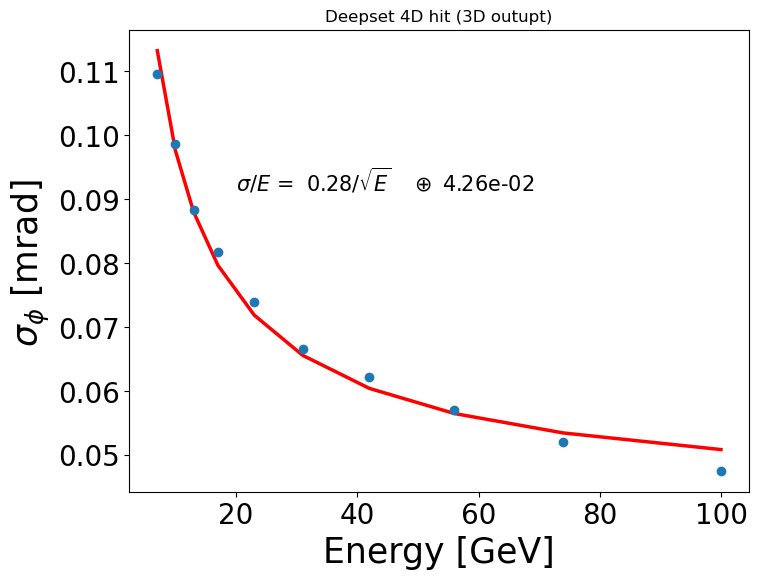

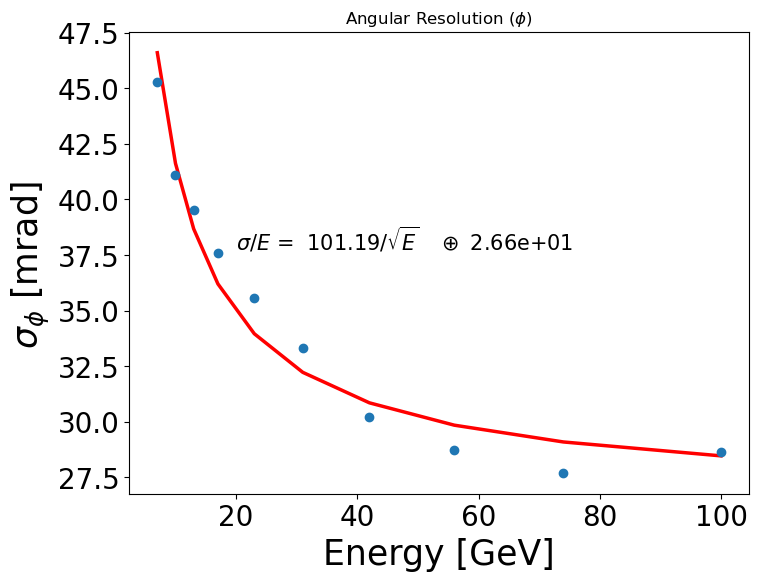

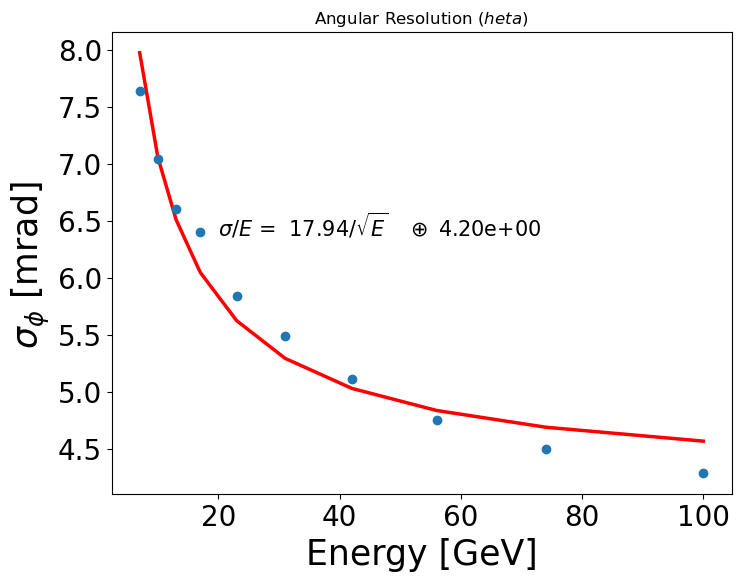

In [50]:
energy_min=5
energy_max=105
mask=np.logical_and(ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg>energy_min,
      ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg<energy_max)

var_X=[straw_discrete_energy_pp_hcal_with_ecal_10_30deg[mask],
       ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg[mask], 
       ds_energy_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse_10_30deg[mask],
       ds_phi_3Doutput_phi_pp_hcal_4_L4_lre3_size64_mse[mask],
       ds_theta_3Doutput_theta_pp_hcal_4_Lay4_lre3_size64_mse[mask]
      ]



#ds_scale_median_pp_hcal_No_ecal_Input4D_Output3D_L4_lre3_size64_mse_10_30deg
labels=[ "Strawman", "Deepset 4D hit (1D output)", "Deepset 4D hit (3D outupt)", \
        "Angular Resolution ($\phi$)", "Angular Resolution ($\theta$)"]

var_Y_res=[straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg[mask], 
            ds_res_fit_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
           ds_res_fit_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse_10_30deg[mask],
            ds_phi_3Doutput_res_sigma_pp_hcal_4_L4_lre3_size64_mse[mask],
           ds_theta_3Doutput_res_sigma_pp_hcal_4_Lay4_lre3_size64_mse[mask]
          ]




#
#

for energies, resolutions, label in zip(var_X, var_Y_res, labels):
    xpos=20
    ypos=np.max(resolutions)/1.2
    print('------------ ', ypos)
    text_size=15
    last_term=False
    energy_lim=[0, 105]
    xlabel='Energy [GeV]'
    ylabel='$\sigma_{\phi}$ [mrad] '
    fig = plt.figure(figsize=(8, 6)) 
    title=label
    print(title)
    get_resolution_fit_terms(energies,resolutions ,  xpos, ypos, text_size, title, xlabel, ylabel)
#energies, resolutions, energy_lim, xpos, ypos, text_size, title, xlabel, ylabel

## Resolution with 1D, 2D, 3D and 4D hits 

Deepset 4D hit
Deepset 3D hit
Deepset 2D hit
Deepset 1D hit
Strawman


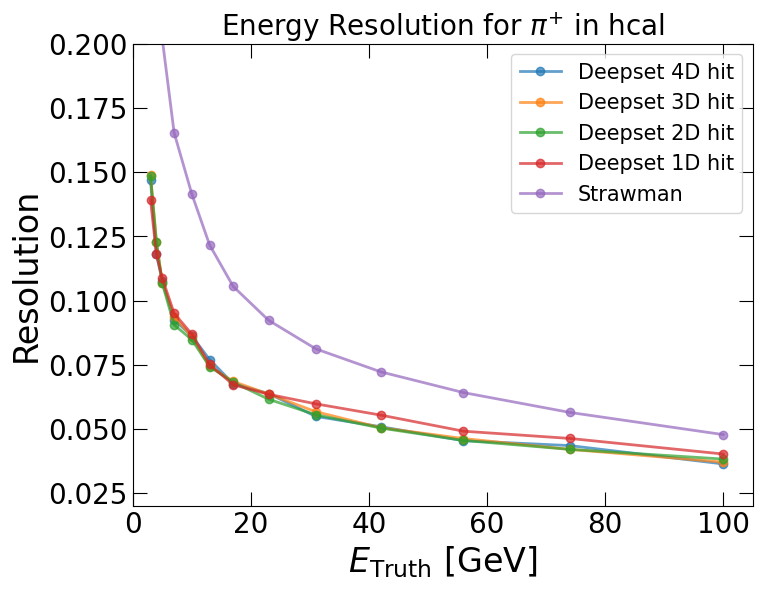

In [14]:
energy_min=2
energy_max=105
mask=np.logical_and(ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg>energy_min,
      ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg<energy_max)

var_X=[ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
       ds_energy_pp_hcal_with_ecal_Input3D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
       ds_energy_pp_hcal_with_ecal_Input2D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
       ds_energy_pp_hcal_with_ecal_Input1D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
       straw_discrete_energy_pp_hcal_with_ecal_10_30deg[mask]
       ]

labels=[ "Deepset 4D hit", "Deepset 3D hit","Deepset 2D hit", "Deepset 1D hit" , "Strawman"]

var_Y_res=[ds_res_fit_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
           ds_res_fit_pp_hcal_with_ecal_Input3D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
           ds_res_fit_pp_hcal_with_ecal_Input2D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
           ds_res_fit_pp_hcal_with_ecal_Input1D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
           straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg[mask]]

var_Y_scale=[ds_scale_median_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
ds_scale_median_pp_hcal_with_ecal_Input3D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
ds_scale_median_pp_hcal_with_ecal_Input2D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
ds_scale_median_pp_hcal_with_ecal_Input1D_Output1D_L4_lre3_size64_mse_10_30deg[mask],
            straw_discrete_scale_median_pp_hcal_with_ecal_10_30deg[mask]]




#straw_discrete_scale_median_pp_hcal_with_ecal_10_30deg
#straw_discrete_energy_pp_hcal_with_ecal_10_30deg,


particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[0,105]
ylim_max=[0.02,0.20]
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

## Energy Scale
## 1D, 2D ...4D hits with 1D output

Deepset 4D hit
Deepset 3D hit
Deepset 2D hit
Deepset 1D hit
Strawman


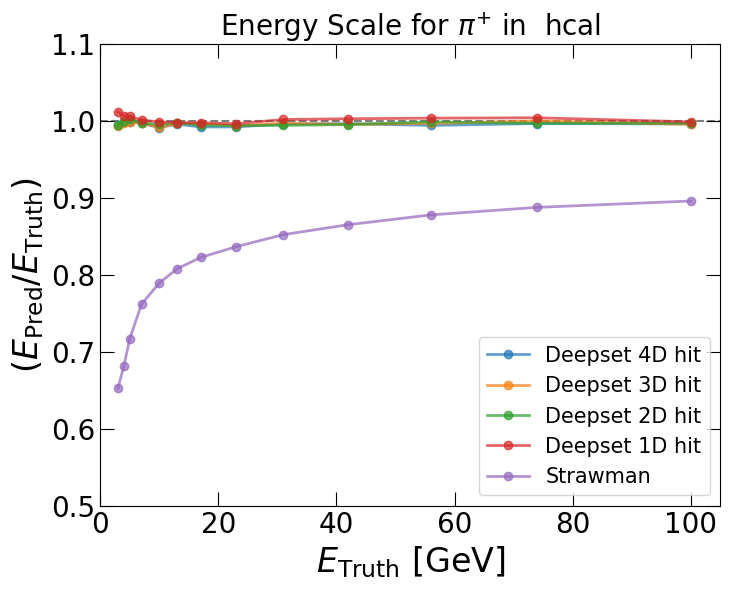

In [15]:
title='scale'
xlim_max=[0,105]
ylim_max=[0.50,1.10]
draw_plot_res_scale(var_X, var_Y_scale, labels, title,  xlim_max, ylim_max, particle, detector, 'lower right')

Deepset input 4D, output 1D
Deepset input 4D, output 3D
Strawman


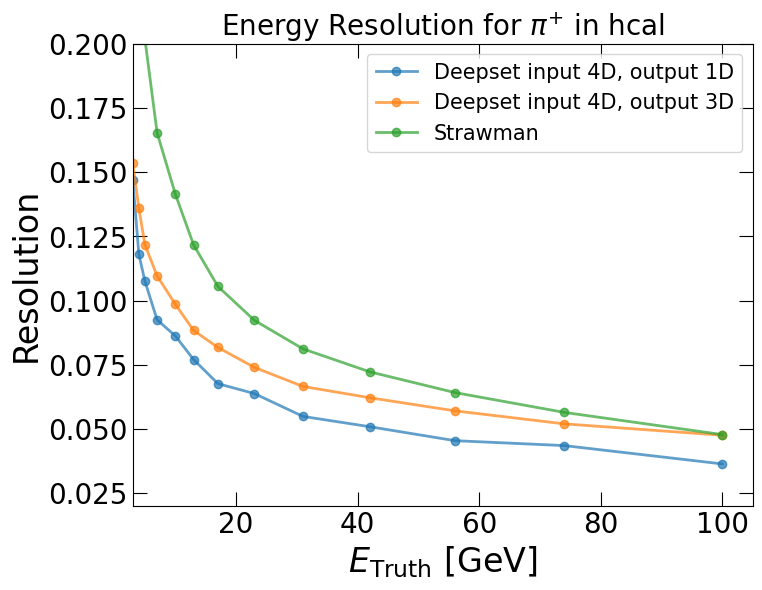

In [14]:

var_X=[ds_energy_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg,
       ds_energy_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse_10_30deg,
     straw_discrete_energy_pp_hcal_with_ecal_10_30deg]


labels=[ "Deepset input 4D, output 1D", "Deepset input 4D, output 3D" , "Strawman"]

var_Y_res=[ds_res_fit_pp_hcal_with_ecal_Input4D_Output1D_L4_lre3_size64_mse_10_30deg,
           ds_res_fit_pp_hcal_with_ecal_Input4D_Output3D_L4_lre3_size64_mse_10_30deg,
           straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg]



#
#straw_discrete_energy_pp_hcal_with_ecal_10_30deg,


particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[3,105]
ylim_max=[0.02,0.20]
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

## Z Sections
## Resolution

Strawman
Deepset 1z 
Deepset 5z 
Deepset 15z 
Deepset 25z 
Deepset 4D cell hits


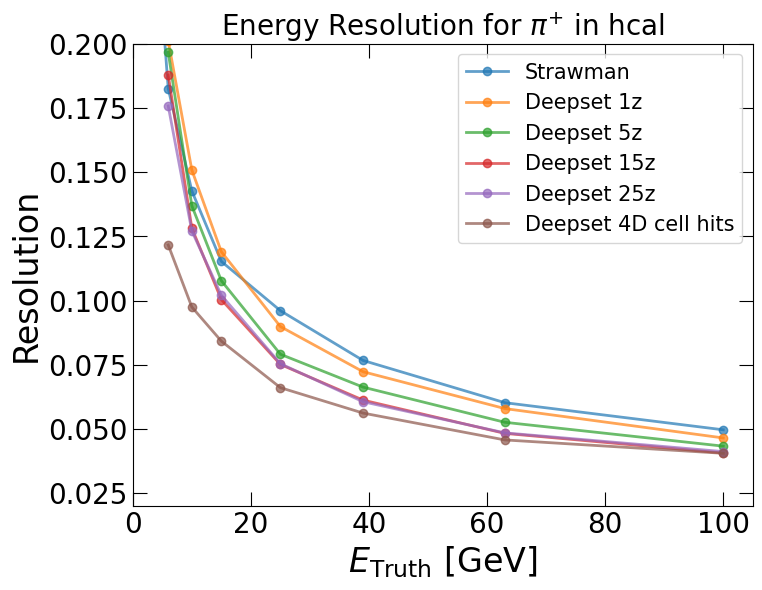

In [42]:
min_energy=3
max_energy=105


ds_energy_pp_hcal_No_ecal_Input4D_Output1D_L4_lre3_size64_mse_17_17deg=np. array([  1.,   2.,   3.,   6.,  10.,  15.,  25.,  39.,  63., 100.])
ds_res_fit_pp_hcal_No_ecal_Input4D_Output1D_L4_lre3_size64_mse_17_17deg=np. array([0.159226, 0.19327 , 0.162609, 0.121663, 0.097471, 0.084185,
       0.066057, 0.056153, 0.045699, 0.040486])
ds_scale_median_pp_hcal_No_ecal_Input4D_Output1D_L4_lre3_size64_mse_17_17deg=np. array([1.16, 0.97, 0.99517 ,\
                0.999129, 0.999003, 0.997085,0.99127 , 0.995905, 0.99209 , 0.992178])


mask=np.logical_and(straw_discrete_energy_pp_hcal_No_ecal_17_17deg>min_energy, 
straw_discrete_energy_pp_hcal_No_ecal_17_17deg<max_energy)

var_X=[straw_discrete_energy_pp_hcal_No_ecal_17_17deg,
    ds_energy_pp_hcal_No_ecal_Input1Z_Output1D_L4_lre3_size64_mse_17_17deg[mask],
       ds_energy_pp_hcal_No_ecal_Input5Z_Output1D_L4_lre3_size64_mse_17_17deg[mask], 
      ds_energy_pp_hcal_No_ecal_Input15Z_Output1D_L4_lre3_size64_mse_17_17deg[mask],
      ds_energy_pp_hcal_No_ecal_Input25Z_Output1D_L4_lre3_size64_mse_17_17deg[mask],
       ds_energy_pp_hcal_No_ecal_Input4D_Output1D_L4_lre3_size64_mse_17_17deg[mask]
     ]
labels=[ "Strawman", "Deepset 1z ","Deepset 5z ","Deepset 15z " ,"Deepset 25z ", "Deepset 4D cell hits"]

var_Y_res=[straw_discrete_res_fit_pp_hcal_No_ecal_17_17deg,
           ds_res_fit_pp_hcal_No_ecal_Input1Z_Output1D_L4_lre3_size64_mse_17_17deg[mask], 
          ds_res_fit_pp_hcal_No_ecal_Input5Z_Output1D_L4_lre3_size64_mse_17_17deg[mask],
           ds_res_fit_pp_hcal_No_ecal_Input15Z_Output1D_L4_lre3_size64_mse_17_17deg[mask],
           ds_res_fit_pp_hcal_No_ecal_Input25Z_Output1D_L4_lre3_size64_mse_17_17deg[mask],
           ds_res_fit_pp_hcal_No_ecal_Input4D_Output1D_L4_lre3_size64_mse_17_17deg[mask]
            ]


var_Y_scale=[straw_discrete_scale_median_pp_hcal_No_ecal_17_17deg,
             ds_scale_median_pp_hcal_No_ecal_Input1Z_Output1D_L4_lre3_size64_mse_17_17deg[mask],
 ds_scale_median_pp_hcal_No_ecal_Input5Z_Output1D_L4_lre3_size64_mse_17_17deg[mask],
    ds_scale_median_pp_hcal_No_ecal_Input15Z_Output1D_L4_lre3_size64_mse_17_17deg[mask],
   ds_scale_median_pp_hcal_No_ecal_Input25Z_Output1D_L4_lre3_size64_mse_17_17deg[mask],
             ds_scale_median_pp_hcal_No_ecal_Input4D_Output1D_L4_lre3_size64_mse_17_17deg[mask]
            ]


particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[0,105]
ylim_max=[0.02,0.20]
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

## Z Sections
## Energy Scale

Strawman
Deepset 1z 
Deepset 5z 
Deepset 15z 
Deepset 25z 
Deepset 4D cell hits


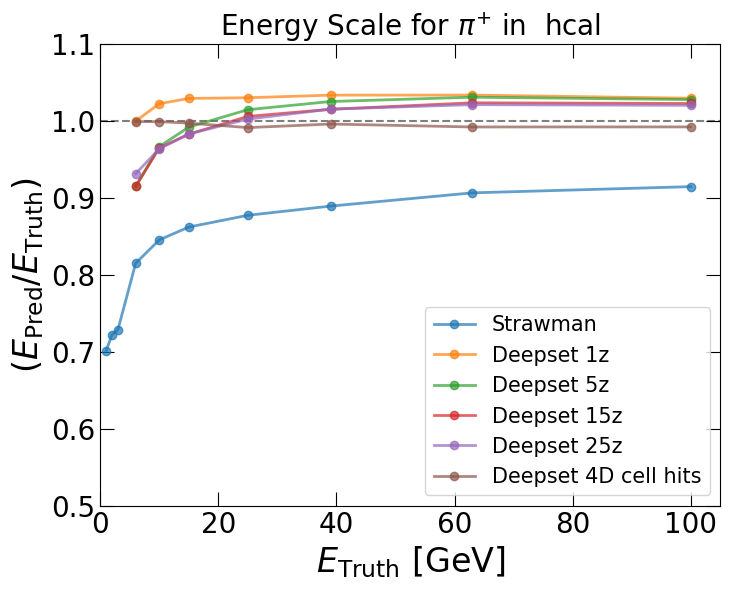

In [43]:
title='scale'
xlim_max=[0,105]
ylim_max=[0.50,1.10]
draw_plot_res_scale(var_X, var_Y_scale, labels, title,  xlim_max, ylim_max, particle, detector, 'lower right')

## THETA 

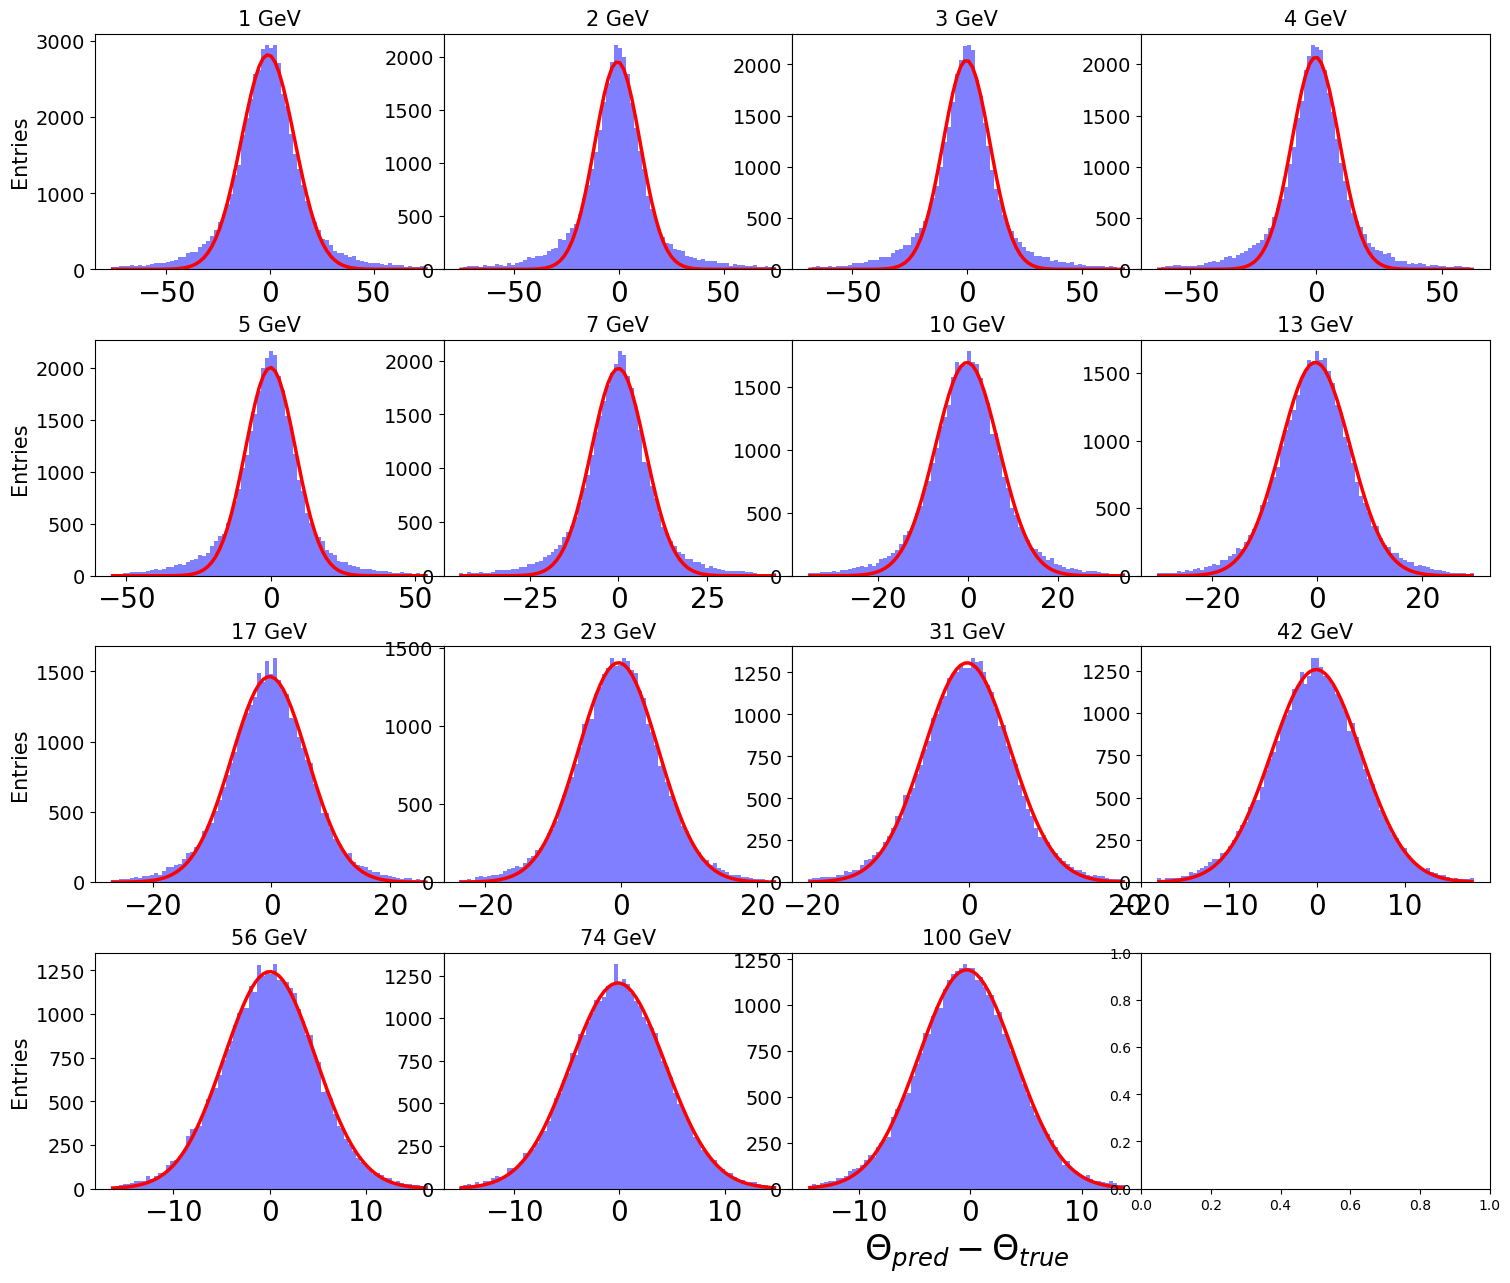

In [14]:
nbins=80
#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
data_type='discrete'
particle='pp'
#detector='hcal'
fit_dist=True
#fit_dist=False
min_val=1
max_val=105
Nbins=100
binning=[1, 2, 3, 4, 5, 7, 10, 13, 17, 23, 31, 42, 56, 74, 100, 133]
#binning=np.linspace(min_val, max_val, Nbins)
deg_to_rad=(np.pi/180)*1000
theta_pred_minus_true_deg=(pred_theta - target_theta)  
theta_pred_minus_true= np.multiply(theta_pred_minus_true_deg, deg_to_rad)

sigma_theta, pred_over_truth_fit, true_theta,slices_fit, slices_pred_truth =\
get_res_scale_fit_log10_log2(target_ene,theta_pred_minus_true ,  binning, nbins,data_type, \
particle, 'theta-energy', fit=True, plot_range=0.5)

       
                

## Print theta

In [15]:
input_dim=4
learning_rate='e3'
latent_size=64
error_type='mse'
#particle='pp'
num_layer=4
include_ecal=True
output_dim=3
detector='hcal'
name_tag='ds_theta_3Doutput_'
particle='pp'
particle_detector=f'{particle}_{detector}_{input_dim}_Lay{num_layer}_lr{learning_rate}_size{latent_size}_{error_type}'
print_parameter(true_theta, name_tag +'theta',particle_detector ) 
print_parameter(sigma_theta, name_tag+'res_sigma',particle_detector  ) ## std over median
#print_parameter(pred_minus_true_theta, name_tag +'theta_scale', particle_detector ) ## sigma over mean fit 

ds_theta_3Doutput_theta_pp_hcal_4_Lay4_lre3_size64_mse=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
ds_theta_3Doutput_res_sigma_pp_hcal_4_Lay4_lre3_size64_mse=np. array([12.817145, 10.82564 , 10.156156,  9.397438,  8.686663,  7.636673,
        7.044074,  6.598939,  6.398987,  5.835053,  5.488618,  5.109353,
        4.75464 ,  4.492746,  4.288095])


## Phi

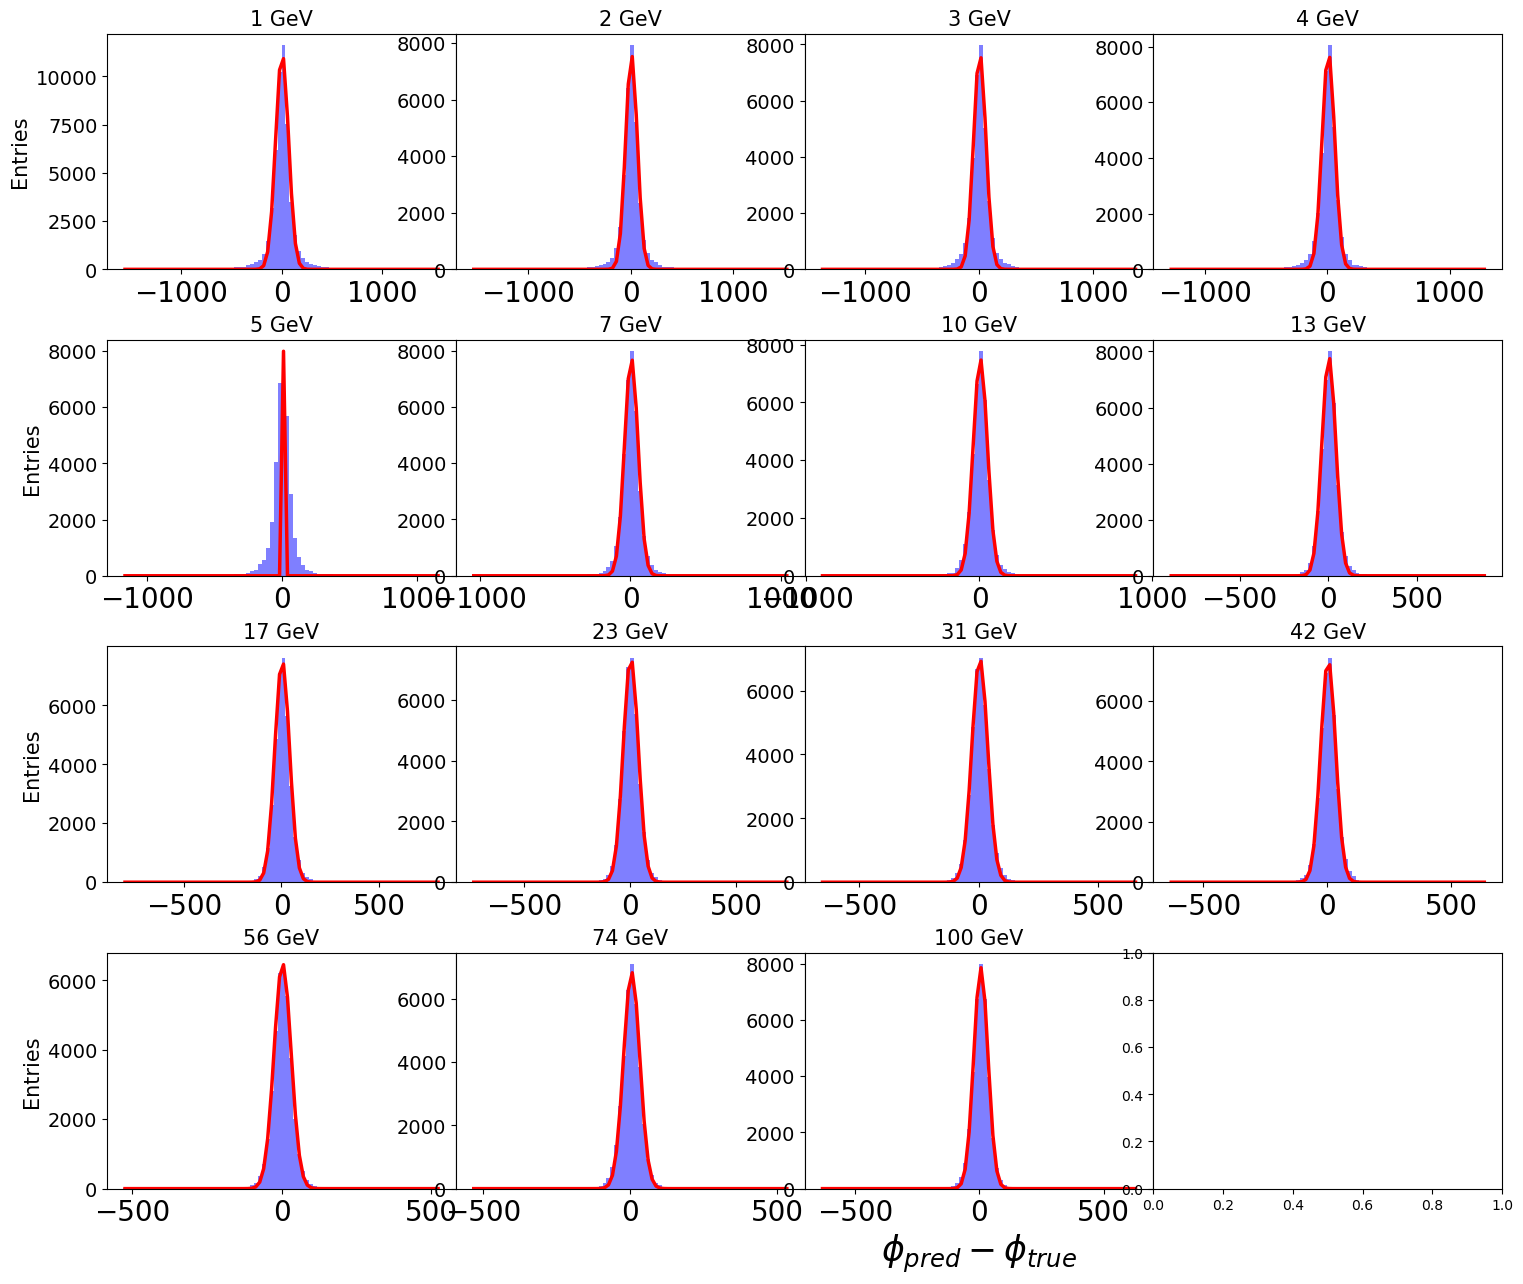

In [16]:
nbins=80
#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
data_type='discrete'
particle='pp'
#detector='hcal'
fit_dist=True
#fit_dist=False
min_val=1
max_val=105
Nbins=100
binning=[1, 2, 3, 4, 5, 7, 10, 13, 17, 23, 31, 42, 56, 74, 100, 133]
#binning=np.linspace(min_val, max_val, Nbins)
deg_to_rad=(np.pi/180)*1000
phi_pred_minus_true_deg=(pred_phi - target_phi)  

phi_pred_minus_true= np.multiply(phi_pred_minus_true_deg, deg_to_rad)


sigma_phi, pred_over_truth_fit, true_phi,slices_fit, slices_pred_truth =\
get_res_scale_fit_log10_log2(target_ene,phi_pred_minus_true ,  binning, nbins,data_type, \
particle, 'phi-energy', fit=True, plot_range=0.5)


In [17]:
name_tag='ds_phi_3Doutput_'

particle='pp'
particle_detector=f'{particle}_{detector}_{input_dim}_L{num_layer}_lr{learning_rate}_size{latent_size}_{error_type}'
print_parameter(true_phi, name_tag +'phi',particle_detector ) 
print_parameter(sigma_phi, name_tag+'res_sigma',particle_detector  ) ## std over median
#print_parameter(pred_over_true_theta, name_tag +'phi_scale', particle_detector ) ## sigma over mean fit 


ds_phi_3Doutput_phi_pp_hcal_4_L4_lre3_size64_mse=np. array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  13.,  17.,  23.,  31.,
        42.,  56.,  74., 100.])
ds_phi_3Doutput_res_sigma_pp_hcal_4_L4_lre3_size64_mse=np. array([64.200392, 57.167455, 54.296241, 51.844851,  2.635363, 45.261807,
       41.099877, 39.520196, 37.601936, 35.553145, 33.296915, 30.209387,
       28.737532, 27.712136, 28.639827])


In [ ]:
#detector='hcal'
name_tag='ds_theta_ene_3Doutput_'
#input_dim='4D'
learning_rate='e3'
latent_size=64
error_type='mse'
#particle='pp'
num_layer=4
particle_detector=f'{particle}_{detector}_{input_dim}_L{num_layer}_lr{learning_rate}_size{latent_size}_{error_type}'
print_parameter(true_fit, name_tag +'energy',particle_detector ) 
#print_parameter(resolution_scale_corr_median, name_tag+'res_cor',particle_detector  ) ## std over median
print_parameter(resolution_fit, name_tag +'res_fit', particle_detector ) ## sigma over mean fit 

#print_parameter(res_sigma_median, name_tag +'res_sigma', particle_detector ) 
#print_parameter(res_std_median, name_tag +'res_std_median', particle_detector ) 
#print_parameter(res_sigma_median, name_tag +'res_sigma_median', particle_detector )
print_parameter(median_scale_fit, name_tag +'scale_median', particle_detector )

In [ ]:
xpos=30
ypos=0.5
text_size=15
xlabel='Energy [GeV]'
ylabel='$\sigma_{{\Theta}}$ [Deg]'
energy_lim=[0, 105]
energies= ds_theta_ene_3Doutput_energy_pp_hcal_4D_L4_lre3_size64_mse 
         
resolutions=ds_theta_ene_3Doutput_res_fit_pp_hcal_4D_L4_lre3_size64_mse
title='Angular resolutions with Energy'
get_resolution_fit_terms(energies, resolutions, energy_lim, xpos, ypos, text_size, title, xlabel, ylabel)

In [7]:
def return_values(num):
    if num == 2:
        return 1, 2  # Returning two values as a tuple
    elif num == 3:
        return 1, 2, 3  # Returning three values as a tuple
    else:
        return None

# Example usage:
result = return_values(2)
print(result)  # Output: (1, 2)

result = return_values(3)
print(result[0])  # Output: (1, 2, 3)

result = return_values(4)
print(result)  # Output: None

(1, 2)
1
None


## ZDC

In [11]:
path_to_zdc_models='/media/miguel/Elements/DeepSet_models/ZDC_models'  
#readout='staggered_h3'
readout='ustaggered'
incident_angle='0-0.5deg'
hadronic_detector='zdc'
granularity='full_cell_hits'
include_ecal=False
input_features=4
output_dim=3
def get_loss_curve_from_training_zdc(path_to_zdc_models, granularity, output_dim, input_features, \
                             readout, hadronic_detector):
   
    result_dir=f'{readout}/results_{input_features}D_size64_lre3_4Lay_pp_mse'
  
    #print(result_dir)
    conditions = {
    ('full_cell_hits', 3, 4, 'zdc', 'staggered_h3'): 'Block_20230713_2242_concatTrue',
    ('full_cell_hits', 3, 4, 'zdc', 'unstaggered'): 'Block_20230715_1525_concatTrue',
         
     # Add more conditions and corresponding file paths as needed
    }
  
    default_file = "default"
    block_name = conditions.get((granularity, output_dim, input_features, hadronic_detector, readout), default_file)
    if block_name==default_file:
        print('File not found') 
        return None
    else:
        final_model_path= f'{path_to_zdc_models}/{result_dir}/{block_name}'
    print(final_model_path)    
    return final_model_path    
    
    
final_model_path=get_loss_curve_from_training_zdc(path_to_zdc_models, granularity, output_dim, input_features, readout,\
                         hadronic_detector)  

File not found


In [12]:
output_dim=3
input_features=4
hadronic_detector='zdc'
readout='staggered_h3'
#readout='unstaggered'

In [13]:
path_to_discrete_model='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/discrete_inference'
model_dir=f'Input{input_features}D_Output{output_dim}D_{hadronic_detector}_{readout}'
        

path_to_stat=f'{path_to_discrete_model}/{model_dir}/test' 
path_to_result=f'{path_to_discrete_model}/{model_dir}'
target_ene, pred_ene, target_theta, pred_theta, target_phi, pred_phi=\
get_3D_inference_from_discrete_data(path_to_result, path_to_stat)  



#get_3D_inference_from_discrete_data(path_to_result, path_to_stat, file="test_predictions.npz"):

I am in neutron discrete
[10, 11, 12, 13, 14, 16, 17, 19, 21, 24, 26, 29, 32, 35, 39, 43, 47, 52, 57, 63, 70, 77, 85, 93, 103, 114, 125, 138, 152, 168, 185, 204, 225, 248, 274, 302]


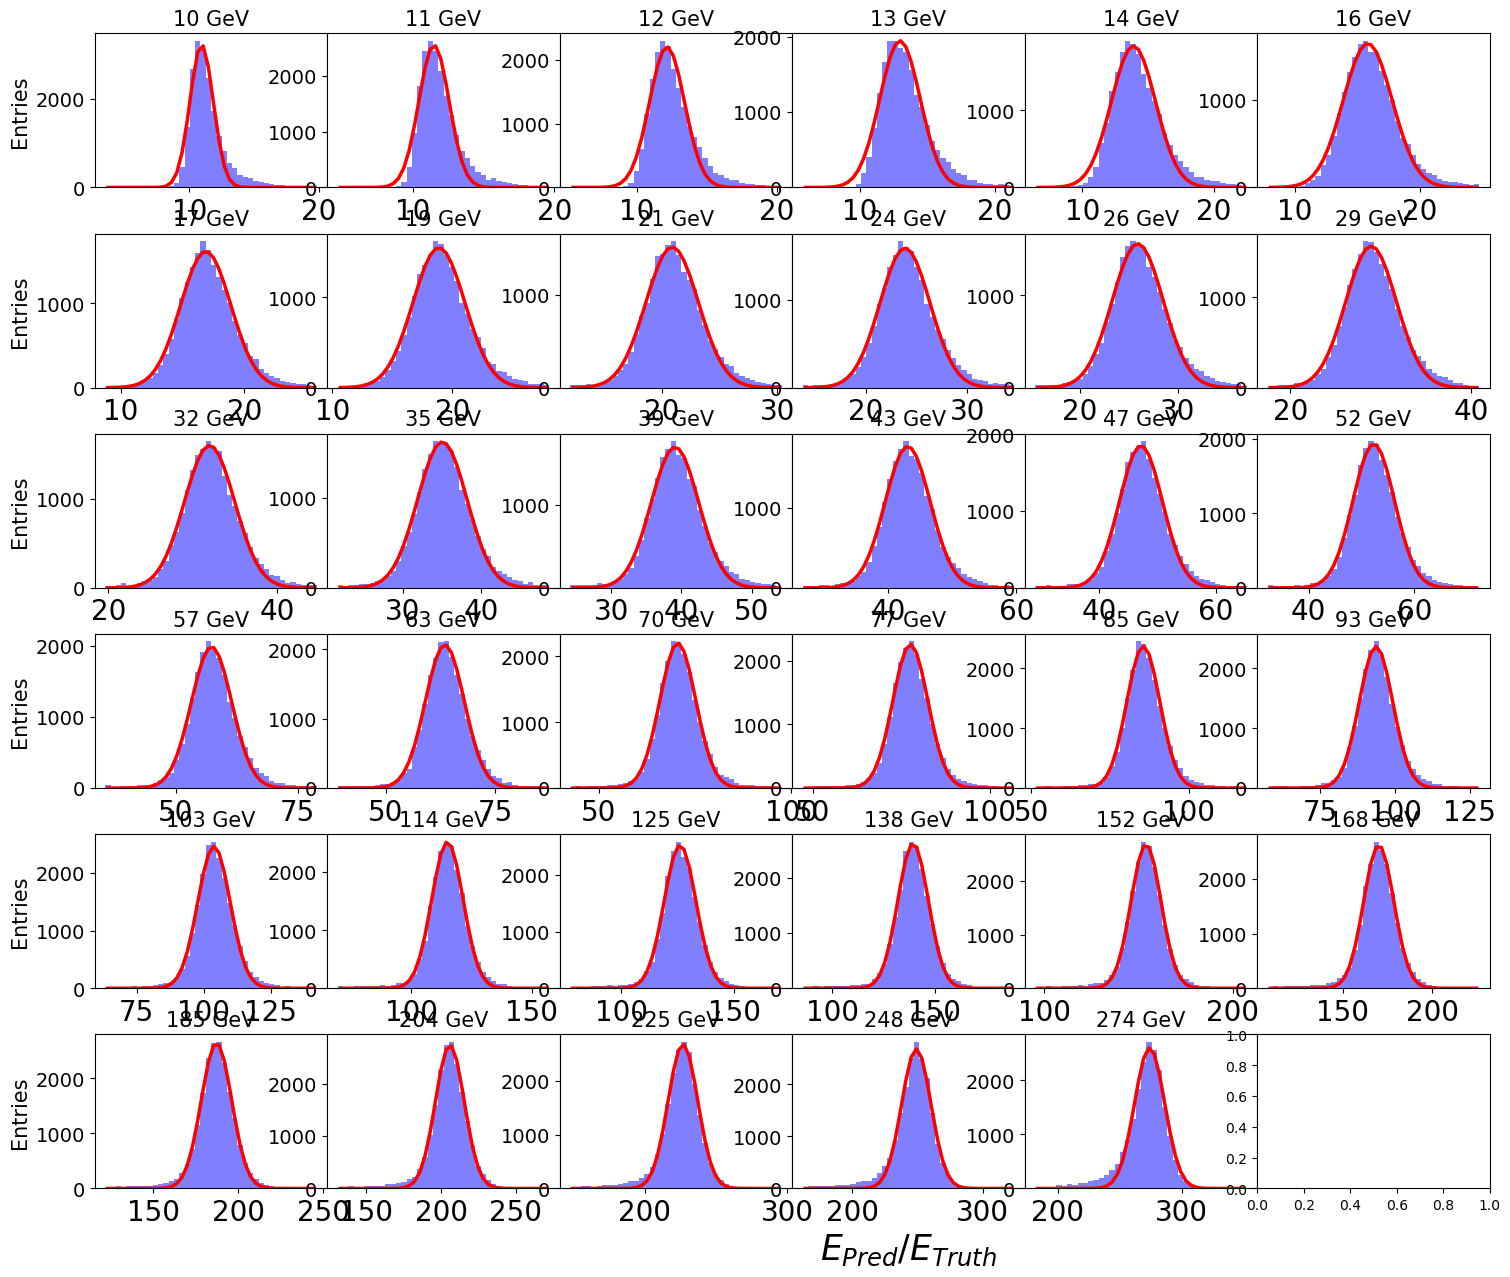

In [14]:
data_type='discrete'
#detector='hcal'
particle='neutron'
nbins=40

#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"

min_val=0
max_val=110
Nbins=37
if (data_type=='discrete') and (particle=='pp'):
    min_val=0
    max_val=110
    binning=[1, 2, 3, 4, 5, 7, 10, 13, 17, 23, 31, 42, 56, 74, 100, 133]
    print('I am in pp discrete')
elif (data_type=='discrete') and (particle=='neutron'):
    min_val=15
    max_val=310
    print('I am in neutron discrete')
    binning=[10, 11, 12, 13, 14, 16, 17, 19, 21, 24, 26, 29, 32, 35, 39, 43, 47, 52, 57, 63, 70, 77, 85,\
             93, 103, 114, 125, 138, 152, 168, 185, 204, 225, 248, 274, 302]
print(binning)

resolution_fit, pred_over_truth_fit, true_fit,slices_fit, slices_pred_truth =get_res_scale_fit_log10_log2(target_ene,pred_ene, binning,
                nbins, data_type, particle)

In [15]:
detector='hcal'
name_tag=f'ds_zdc_3Doutput_{readout}_'
#input_dim='4D'
learning_rate='e3'
latent_size=64
error_type='mse'
#particle='pp'
num_layer=4
approach="Deepset"
particle_detector=f'{particle}_{detector}_input{input_features}D_Lay{num_layer}_lr{learning_rate}_\
size{latent_size}_{error_type}'
print_parameter(true_fit, name_tag +'energy',particle_detector ) 
#print_parameter(resolution_scale_corr_median, name_tag+'res_cor',particle_detector  ) ## std over median
print_parameter(resolution_fit, name_tag +'res_fit', particle_detector ) ## sigma over mean fit 

#print_parameter(res_sigma_median, name_tag +'res_sigma', particle_detector ) 
#print_parameter(res_std_median, name_tag +'res_std_median', particle_detector ) 
#print_parameter(res_sigma_median, name_tag +'res_sigma_median', particle_detector )
print_parameter( pred_over_truth_fit, name_tag +'scale_median', particle_detector )


df = pd.DataFrame(slices_fit)
df.to_csv(f'{output_path}/pred_{approach}_{hadronic_detector}_{readout}.csv', index=False)  


## Pred over Truth
#df_straw_truth = pd.DataFrame(slices_pred_truth)
#df_straw_truth.to_csv(f'{output_path}/pred_true_{approach}_{hadronic_detector}_{readout}.csv', index=False)

ds_zdc_3Doutput_staggered_h3_energy_neutron_hcal_input4D_Lay4_lre3_size64_mse=np. array([ 10.,  11.,  12.,  13.,  14.,  16.,  17.,  19.,  21.,  24.,  26.,
        29.,  32.,  35.,  39.,  43.,  47.,  52.,  57.,  63.,  70.,  77.,
        85.,  93., 103., 114., 125., 138., 152., 168., 185., 204., 225.,
       248., 274.])
ds_zdc_3Doutput_staggered_h3_res_fit_neutron_hcal_input4D_Lay4_lre3_size64_mse=np. array([0.081986, 0.093116, 0.102862, 0.114843, 0.12077 , 0.123494,
       0.120466, 0.114741, 0.109359, 0.102912, 0.100336, 0.097205,
       0.092803, 0.089272, 0.086154, 0.081911, 0.07805 , 0.074888,
       0.072216, 0.069786, 0.06607 , 0.06394 , 0.061429, 0.059949,
       0.058193, 0.056744, 0.055863, 0.05359 , 0.05139 , 0.049515,
       0.047851, 0.046847, 0.045942, 0.04501 , 0.044406])
ds_zdc_3Doutput_staggered_h3_scale_median_neutron_hcal_input4D_Lay4_lre3_size64_mse=np. array([1.0957  , 1.044841, 1.014258, 0.997793, 0.991561, 0.99058 ,
       0.992886, 0.993628, 0.993925, 0.994798, 0

## Get the access to the final result directory for training continuous data

In [6]:
input_features=4
output_dim=3
granularity='full_cell_hits'
#granularity='z_sections'
hadronic_detector='hcal'
incident_angle='10_30deg'
include_ecal=True    ### Remains true for the 

num_z_layers=5

#### For now
if granularity=='z_sections':
    include_ecal=False
    output_dim=1
path_to_deepset_models= '/media/miguel/Elements/DeepSet_models'    
    
final_model_path=get_loss_curve_from_training_hcal(path_to_deepset_models, granularity, output_dim, input_features, incident_angle,\
                         hadronic_detector, z_sections, include_ecal)    

print(final_model_path)   
npz_unpacked_loss = np.load(final_model_path + "/losses.npz")

train_loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']
#Plot_Loss_Curve(loss[:,-1],val_loss[:,-1],path,loss_string="MAE") #label loss yourself here
plt.plot(train_loss[:,-1],label='train ')
plt.plot(val_loss[:,-1], label='val')
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss (MSE)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0.0,0.05)
plt.legend(fontsize=15)
plt.title(f'{hadronic_detector}, Input={input_features}D,  Output= {output_dim}D')



In [ ]:
npz_unpacked_loss = np.load(final_model_path + "/losses.npz")

train_loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']
#Plot_Loss_Curve(loss[:,-1],val_loss[:,-1],path,loss_string="MAE") #label loss yourself here
plt.plot(train_loss[:,-1],label='train ')
plt.plot(val_loss[:,-1], label='val')
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss (MSE)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0.0,0.10)
plt.legend(fontsize=15)
plt.title(f'{hadronic_detector}, Input={input_features}D,  Output= {output_dim}D')

In [18]:
(4+8+16+32+64+128+256)/7

72.57142857142857

Strawman (With ECAL)
Strawman (without ECAL)


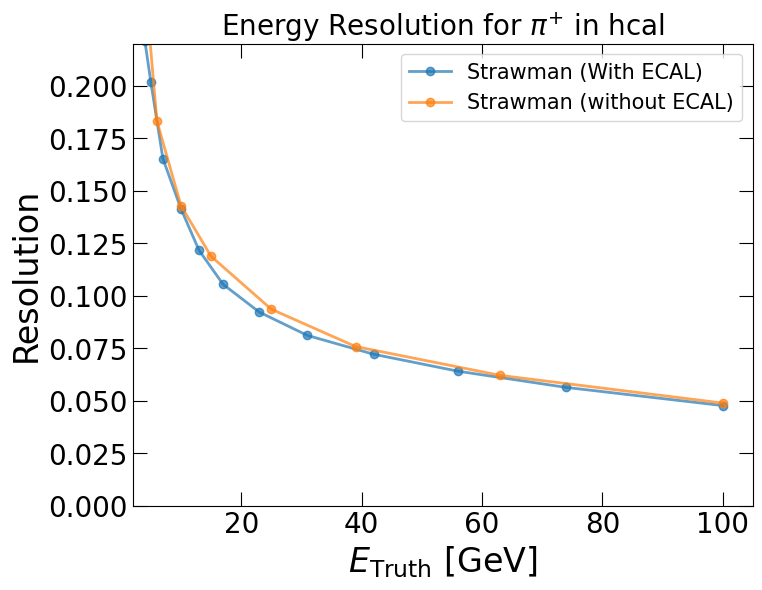

In [29]:
var_X=[straw_discrete_energy_pp_hcal_with_ecal_10_30deg,
       straw_discrete_energy_pp_hcal_No_ecal_17_17deg]



labels=[ "Strawman (With ECAL)", "Strawman (without ECAL)"]

var_Y_res=[straw_discrete_res_fit_pp_hcal_with_ecal_10_30deg, 
           straw_discrete_res_fit_pp_hcal_No_ecal_17_17deg ]
particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[2,105]
ylim_max=[0.0,0.22]
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

Strawman (unstaggered)
Deepset 4D hit (unstaggered)
Starwman (staggered_h3)
Deepset 4D hit (staggered_h3)


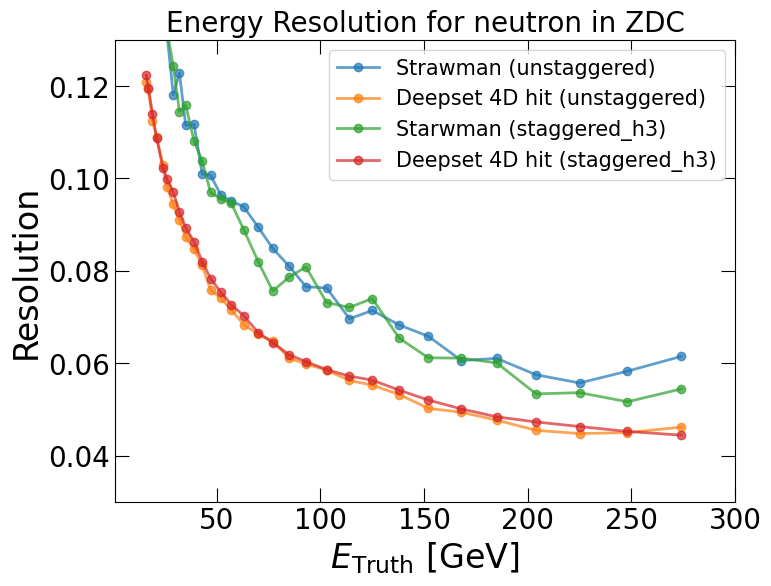

In [19]:
mask=straw_discrete_staggered_h3_energy_neutron_zdc_No_ecal>14
straw_discrete_unstaggered_energy_neutron_zdc_No_ecal[mask],
straw_discrete_unstaggered_res_fit_neutron_zdc_No_ecal[mask]
var_X=[straw_discrete_unstaggered_energy_neutron_zdc_No_ecal[mask],
       ds_zdc_3Doutput_unstaggered_energy_neutron_hcal_input4D_Lay4_lre3_size64_mse[mask], 
       straw_discrete_staggered_h3_energy_neutron_zdc_No_ecal[mask],
      ds_zdc_3Doutput_staggered_h3_energy_neutron_hcal_input4D_Lay4_lre3_size64_mse[mask]
     ]
labels=[ "Strawman (unstaggered)", "Deepset 4D hit (unstaggered)",'Starwman (staggered_h3)', \
        'Deepset 4D hit (staggered_h3)']

var_Y_res=[ straw_discrete_unstaggered_res_fit_neutron_zdc_No_ecal[mask], 
          ds_zdc_3Doutput_unstaggered_res_fit_neutron_hcal_input4D_Lay4_lre3_size64_mse[mask],
           straw_discrete_staggered_h3_res_fit_neutron_zdc_No_ecal[mask],
           ds_zdc_3Doutput_staggered_h3_res_fit_neutron_hcal_input4D_Lay4_lre3_size64_mse[mask]
            ]


var_Y_scale=[straw_discrete_unstaggered_scale_median_neutron_zdc_No_ecal[mask],
  ds_zdc_3Doutput_unstaggered_scale_median_neutron_hcal_input4D_Lay4_lre3_size64_mse[mask],
    straw_discrete_staggered_h3_scale_median_neutron_zdc_No_ecal[mask],
    ds_zdc_3Doutput_staggered_h3_scale_median_neutron_hcal_input4D_Lay4_lre3_size64_mse[mask],
            ]






particle='neutron'
title='resolution'
detector='ZDC'
xlim_max=[1,300]
ylim_max=[0.03,0.13]
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

Strawman (unstaggered)
Deepset 4D hit (unstaggered)
Starwman (staggered_h3)
Deepset 4D hit (staggered_h3)


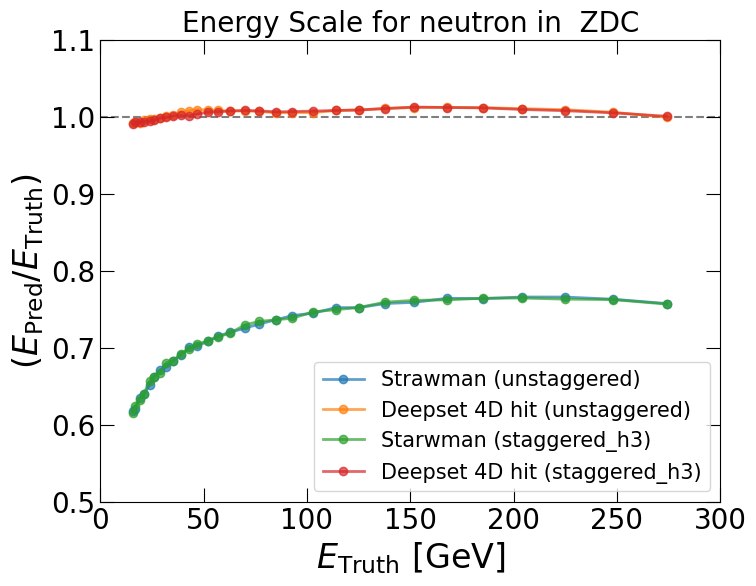

In [20]:
title='scale'
xlim_max=[0,300]
ylim_max=[0.50,1.10]
draw_plot_res_scale(var_X, var_Y_scale, labels, title,  xlim_max, ylim_max, particle, detector, 'lower right')

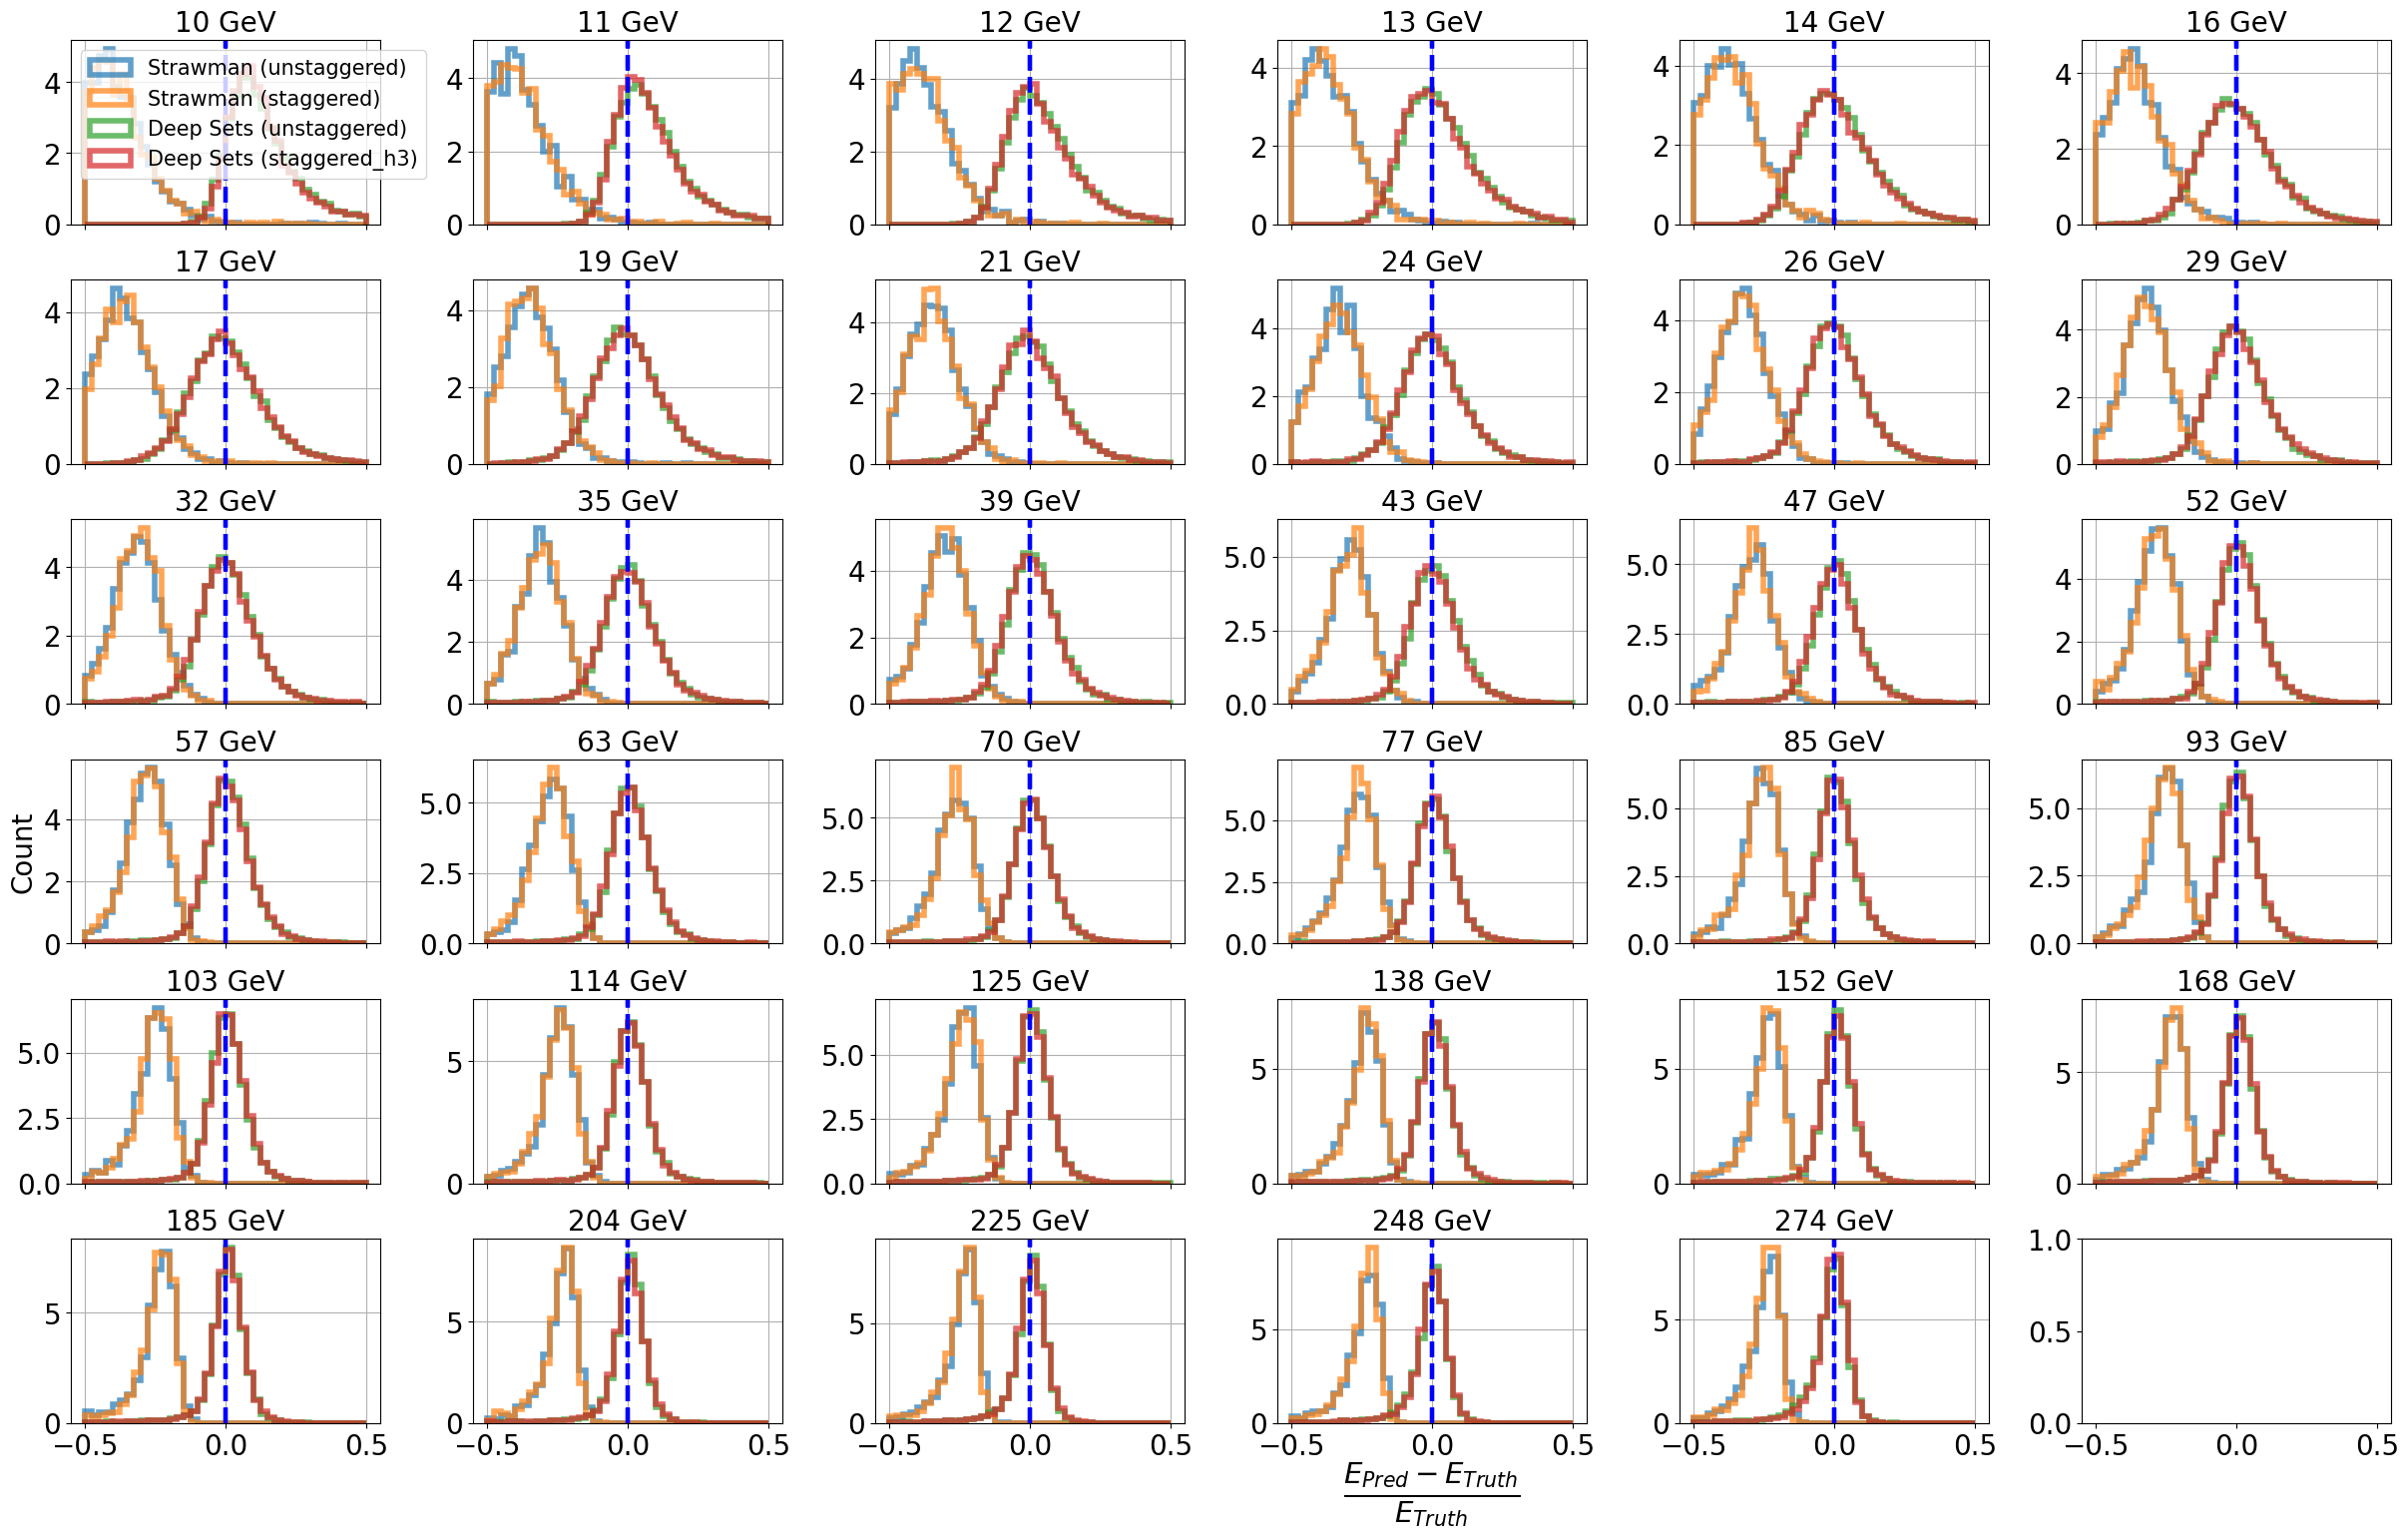

In [39]:
output_path='/home/bishnu/EIC/output_reg_dnn_straw/DeepSets'

particle='neutron'
detector='zdc'

#labels=['4D (ECAL + HCAL)'  , 'strawman']#, '2D', '3D', '4D', 'strawman']      ## Input features
labels=['Strawman (unstaggered)','Strawman (staggered)',  'Deep Sets (unstaggered)','Deep Sets (staggered_h3)']
data_type='discrete'


files_pred_true=[f'{output_path}/pred_true_straw_zdc_unstaggered.csv',
 f'{output_path}/pred_true_straw_zdc_staggered_h3.csv',
f'{output_path}/pred_true_Deepset_zdc_unstaggered.csv',
f'{output_path}/pred_true_Deepset_zdc_staggered_h3.csv',]       
if (data_type=='discrete') and (particle=='pp'):
    binning=[1, 2, 3, 4, 5, 7, 10, 13, 17, 23, 31, 42, 56, 74, 100, 133]
elif (data_type=='discrete') and (particle=='neutron'):
    binning=[10, 11, 12, 13, 14, 16, 17, 19, 21, 24, 26, 29, 32, 35, 39, 43, 47, 52, 57, 63, 70, 77, 85,\
             93, 103, 114, 125, 138, 152, 168, 185, 204, 225, 248, 274, 302] 
nbins=40

compare_energy_response_E_over_pred(files_pred_true, binning, data_type,particle,detector, 
                                    labels,ratio_E_pred=True, ylogscale=False)


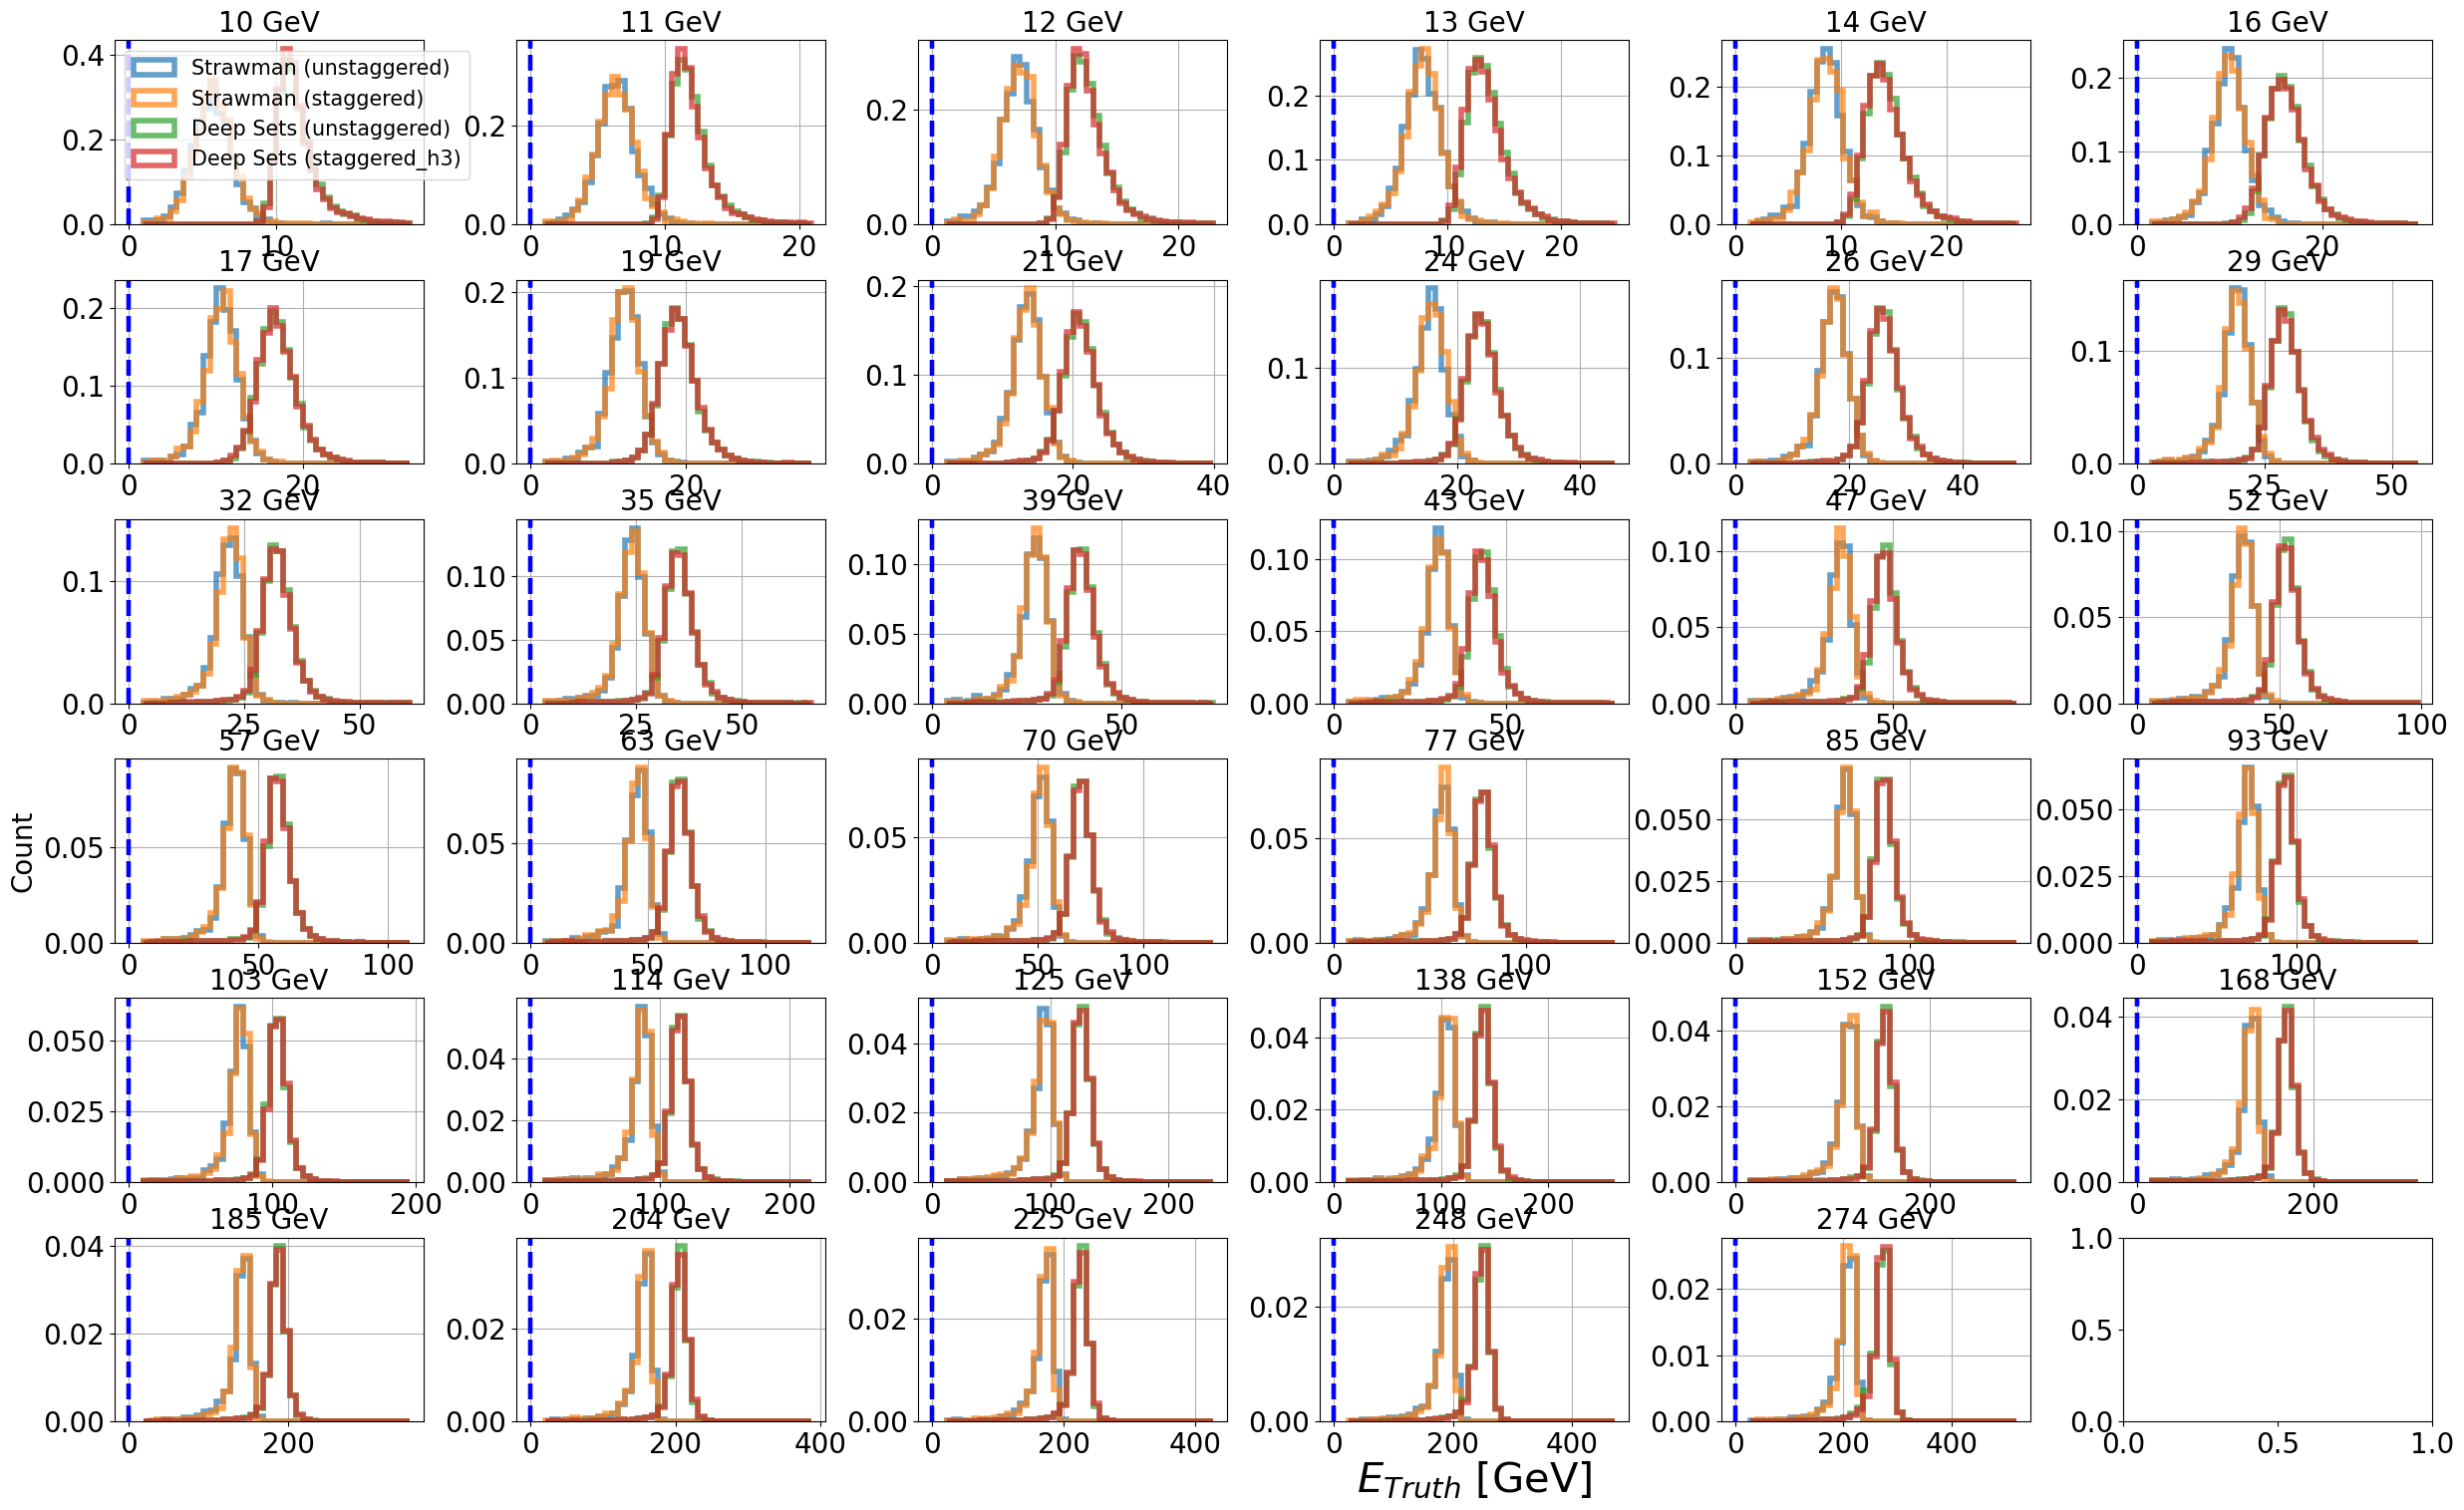

In [16]:
output_path='/home/bishnu/EIC/output_reg_dnn_straw/DeepSets'

particle='neutron'
detector='zdc'

#labels=['4D (ECAL + HCAL)'  , 'strawman']#, '2D', '3D', '4D', 'strawman']      ## Input features
labels=['Strawman (unstaggered)','Strawman (staggered)',  'Deep Sets (unstaggered)','Deep Sets (staggered_h3)']
data_type='discrete'


files_pred_true=[f'{output_path}/pred_straw_zdc_unstaggered.csv',
 f'{output_path}/pred_straw_zdc_staggered_h3.csv',
f'{output_path}/pred_Deepset_zdc_unstaggered.csv',
f'{output_path}/pred_Deepset_zdc_staggered_h3.csv',]       
if (data_type=='discrete') and (particle=='pp'):
    binning=[1, 2, 3, 4, 5, 7, 10, 13, 17, 23, 31, 42, 56, 74, 100, 133]
elif (data_type=='discrete') and (particle=='neutron'):
    binning=[10, 11, 12, 13, 14, 16, 17, 19, 21, 24, 26, 29, 32, 35, 39, 43, 47, 52, 57, 63, 70, 77, 85,\
             93, 103, 114, 125, 138, 152, 168, 185, 204, 225, 248, 274, 302] 
nbins=40

compare_energy_response_E_over_pred(files_pred_true, binning, data_type,particle,detector, 
                                    labels,ratio_E_pred=False, ylogscale=False)

Energy


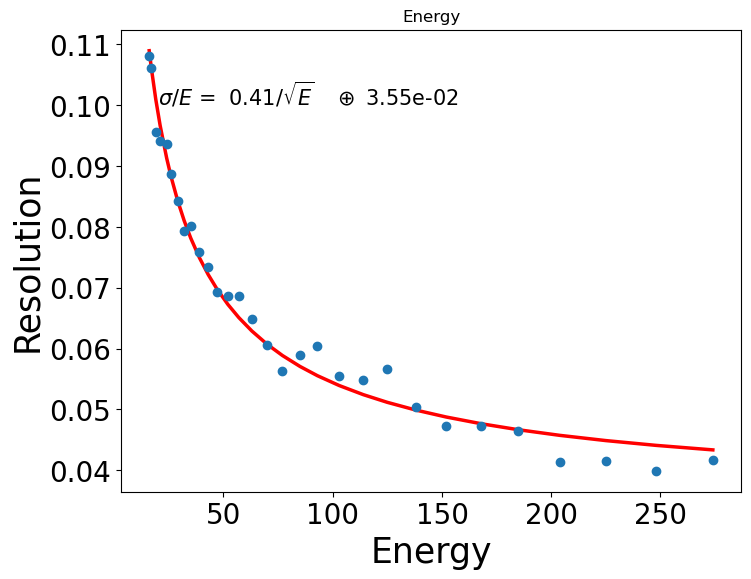

In [9]:
xpos=20
ypos=0.1
text_size=15
last_term=False
energy_lim=[15, 300]
label='Energy'
xlabel="Energy"
ylabel="Resolution"

fig = plt.figure(figsize=(8, 6)) 
title=label
print(title)
'''
#get_resolution_fit_terms(energies, resolutions, energy_lim, xpos, ypos, text_size, title, xlabel, ylabel):
get_resolution_fit_terms(straw_discrete_unstaggered_energy_neutron_zdc_No_ecal, \
                        straw_discrete_unstaggered_res_fit_neutron_zdc_No_ecal, energy_lim, xpos, ypos, text_size, title, \
                         xlabel, ylabel)
'''                        
get_resolution_fit_terms(straw_discrete_staggered_h3_energy_neutron_zdc_No_ecal, \
                        straw_discrete_staggered_h3_res_fit_neutron_zdc_No_ecal, energy_lim, xpos, ypos, text_size, title, \
                         xlabel, ylabel)                       